# **LabelGenius Colab Demo**

To ensure accessibility and reproducibility for reviewers and researchers—especially those without local GPUs or complex Python environments—we provide an **end-to-end Google Colab notebook**.

### Why Google Colab?

[Google Colab](https://colab.research.google.com/signup?utm_source=resource_tab&utm_medium=link&utm_campaign=want_more_resources) offers a **free tier** and a **Pro for Education** plan designed for students and academic users, providing:

- **100 compute units per month** (units expire after 90 days; additional units available for purchase)
- **Faster GPUs** including recent NVIDIA cards
- **High-memory machines** for processing larger datasets and models

This eliminates the need to install or configure CUDA, Metal, or complex Python environments locally—simply open the notebook and run.

### Important Limitations

> **⚠️ This is a demonstration only**  
>
> The Colab notebook is intentionally limited to **~20-50 samples per task** for fast runtime and easy verification. Please note:
>
> - **Not a full replication**: Results do not match the complete case study findings in the paper
> - **Expected variance**: Accuracy will differ from published results due to the small sample size
> - **Extreme results possible**: With only 20-50  samples per task, you may observe very high or very low performance
> - **Fine-tuning limitations**: 20 examples per class is typically insufficient to learn nuanced distinctions, so fine-tuning may not show improvement
>
> **For complete results and full replication for the case studies**, please refer to the **`Case_study/`** folder in our [GitHub repository](https://github.com/mediaccs/LabelGenius).

#**Installation**

Install the latest release from PyPI:

You can use the either way below to download LabeiGenius from pip or directly form the LabelGenius.py. Please note you only need to run **one** of the code below in the installation section.

In [ ]:
# pip install google.colab

from google.colab import drive
drive.mount("/content/drive")


# Create a folder in your google drive named "GenAI_DEMO" set the working drirection to GenAI_DEMO folder (adjust the name if different)
import os
folder_path = "/content/drive/MyDrive/GenAI_DEMO"
# Create the folder if it doesn't exist
os.makedirs("/content/drive/MyDrive/GenAI_DEMO", exist_ok=True)
# Change to that folder
os.chdir(folder_path)
print("Current directory:", os.getcwd())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Current directory: /content/drive/MyDrive/GenAI_DEMO


In [ ]:
# Option 1: install through pip
!pip install labelgenius==0.1.6
!pip install --upgrade pip
!pip list --outdated --format=columns

Package                                  Version      Latest       Type
---------------------------------------- ------------ ------------ -----
absl-py                                  1.4.0        2.3.1        wheel
aiofiles                                 24.1.0       25.1.0       wheel
aiohttp                                  3.13.0       3.13.1       wheel
albucore                                 0.0.24       0.0.33       wheel
antlr4-python3-runtime                   4.9.3        4.13.2       wheel
arrow                                    1.3.0        1.4.0        wheel
atpublic                                 5.1          6.0.2        wheel
beautifulsoup4                           4.13.5       4.14.2       wheel
bigframes                                2.24.0       2.25.0       wheel
blosc2                                   3.10.1       3.10.2       wheel
bokeh                                    3.7.3        3.8.0        wheel
Bottleneck                               1.4.2      

In [ ]:
# Option 2: install through the py file

# Clean start
!rm -rf LabelGenius
!git clone https://github.com/mediaccs/LabelGenius

# Install from the cloned folder (editable mode)
%cd LabelGenius
!pip install -e .


#**Load data**

In [ ]:
!gdown --id 1TRREpkkQ6D3FjHngPVmpfK6k1Z1uZwFl -O data.zip

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1TRREpkkQ6D3FjHngPVmpfK6k1Z1uZwFl
To: /content/drive/MyDrive/GenAI_DEMO/data.zip
100% 9.83M/9.83M [00:00<00:00, 36.4MB/s]


In [ ]:
!unzip data.zip

Archive:  data.zip
   creating: Demo_data/
  inflating: __MACOSX/._Demo_data    
  inflating: Demo_data/D2_1.xlsx     
  inflating: __MACOSX/Demo_data/._D2_1.xlsx  
  inflating: Demo_data/.DS_Store     
  inflating: __MACOSX/Demo_data/._.DS_Store  
   creating: Demo_data/D1_imgs_2/
  inflating: __MACOSX/Demo_data/._D1_imgs_2  
  inflating: Demo_data/D1_2.csv      
  inflating: __MACOSX/Demo_data/._D1_2.csv  
  inflating: Demo_data/D1_1.csv      
  inflating: __MACOSX/Demo_data/._D1_1.csv  
   creating: Demo_data/D1_imgs_1/
  inflating: __MACOSX/Demo_data/._D1_imgs_1  
  inflating: Demo_data/D2_2.xlsx     
  inflating: __MACOSX/Demo_data/._D2_2.xlsx  
  inflating: Demo_data/D1_imgs_2/de406c1e-f51f-5bfc-9991-860e3ce6b9d6.jpg  
  inflating: __MACOSX/Demo_data/D1_imgs_2/._de406c1e-f51f-5bfc-9991-860e3ce6b9d6.jpg  
  inflating: Demo_data/D1_imgs_2/97e7c623-d4ce-5413-a932-299ad26af5ec.jpg  
  inflating: __MACOSX/Demo_data/D1_imgs_2/._97e7c623-d4ce-5413-a932-299ad26af5ec.jpg  
  inflating: De

# **Set up the folders**

In [ ]:
import os
os.makedirs("Demo_result", exist_ok=True)
os.makedirs("Demo_finetuned_CLIP", exist_ok=True)

#**Usage examples**

##**Demo 1: Single-Category Classification using N24News Dataset** (Text, Image, Text-Image Pair)


This demo shows how to classify a single news article into one of 24 category
using the N24News dataset. Each article in the dataset includes both textual
and visual information.

Source: https://aclanthology.org/2022.lrec-1.729/


Each article contains the following fields:
- 'section': Ground truth label (one of 24 category)
- 'headline': Title of the article
- 'abstract': Short summary of the article
- 'article': Full text content
- 'article_url': Link to the original article
- 'image': Encoded image or metadata (optional)
- 'caption': Image caption
- 'image_id': Unique image identifier
- 'image_path': Path to the associated image (e.g., 'N24News/imgs_200_sample1/12345.jpg')
- 'article_id': Unique article identifier

Image file: Multimodal_image

Example category (See prompt_D1 for the complete category):
------------------------
1. Health
2. Science
3. Television
...
24. Global Business

Reference:
----------
Wang, Z., Shan, X., Zhang, X., & Yang, J. (2022).
N24News: A New Dataset for Multimodal News Classification.
In *Proceedings of the Thirteenth Language Resources and Evaluation Conference* (pp. 6768–6775). LREC.


### **GPT Labeling**

We provides three GPT-based classification demo:

- **Text only**
- **Image only**
- **Text + image pairs**

## Each mode can be run in **zero-shot or few-shot** (no training), depending on the the promt used (i.e., include examples in prompt or not).

Because OpenAI currently has **limitations on fine-tuning models with image data** (e.g., copyright restrictions and the inability to include images with faces), we provide the **fine-tuning example only for the text-only labeling**.

> **Important limitations:**  
> - We include three model variants for each demo:
>   1. **GPT-4.1** — non-reasoning model (with the parameter `temperature` ranging from `0` = more stable to `2` = more creative)  
>   2. **GPT-5** — non-reasoning mode with `reasoning_effort = minimal`  
>   3. **GPT-5** — reasoning mode with `reasoning_effort = low / medium / high`  
> - **Fine-tuning GPT-5 is not yet available** via the public API.  
>   The fine-tuning example in this demo therefore uses **GPT-4.1**.  
>   We will update LabelGenius to support GPT-5 fine-tuning as soon as OpenAI enables it.

> **Note:**  
> The fine-tuning examples shown in the demo use only a **small sampled subset of the data** (≈200 samples) for speed.  
> They are intended to demonstrate the workflow rather than maximize accuracy.  
> Fine-tuning on larger, task-specific datasets will generally yield stronger performance improvements.




**Datasets (have been downloaded in the previous code)**:

- `D1_1.csv`: Used for initial labeling and fine-tuning.
- `D1_imgs_1`: Used for initial labeling and fine-tuning.

- `D1_2.csv`: Used for testing the fine-tuned model's performance.
- `D1_imgs_2`: Used for testing the fine-tuned model's performance.


Note. The text dataset should contain a column `image_path` to map the images for each row.

In [ ]:
# set up the GPT enviroment
from labelgenius import classification_GPT, generate_GPT_finetune_jsonl, finetune_GPT,price_estimation, auto_verification
api_key = "" # Input your key


# Define the list of 24 category labels
category_D1_GPT = [
    "1", "2", "3", "4", "5", "6",
    "7", "8", "9", "10", "11", "12",
    "13", "14", "15", "16", "17", "18",
    "19", "20", "21", "22", "23", "24"
]


# Define the descriptive prompts for each category
prompt_D1_GPT = ["""You are given a short news article. Based on its content, return the most appropriate category label from the list below. Respond with only a number from 1 to 24, corresponding to the best-matching category:

1. Health – medical news, public health, fitness, mental health, wellness
2. Science – scientific discoveries, research studies, space, innovations
3. Television – TV shows, reviews, industry news, streaming
4. Travel – tourism, destinations, travel guides, airlines, vacation trends
5. Movies – film news, reviews, box office, upcoming releases
6. Dance – ballet, contemporary styles, street dance, performances
7. Real Estate – housing trends, property sales, architecture, urban planning
8. Economy – macroeconomics, inflation, markets, GDP, financial policies
9. Sports – competitions, athletes, Demo_results, professional sports
10. Theater – plays, Broadway, live performances, stage reviews
11. Opinion – editorials, commentary, analysis
12. Music – albums, artists, concerts, festivals, music trends
13. Books – literature, bestsellers, author interviews, book reviews
14. Art & Design – fine arts, museums, exhibitions, visual/design trends
15. Style – fashion trends, beauty, personal style, aesthetics
16. Media – journalism, publishing, digital media, mass communication
17. Food – restaurants, recipes, cooking, culinary culture
18. Well – lifestyle, self-care, mental well-being, personal development
19. Fashion – clothing, designers, fashion weeks, industry insights
20. Technology – AI, gadgets, software, cybersecurity, tech innovations
21. Your Money – personal finance, investing, budgeting, financial planning
22. Education – schools, universities, learning methods, education policies
23. Automobiles – car news, EVs, reviews, industry trends
24. Global Business – international trade, corporations, mergers, global markets

Return the categorty label only (e.g., 5), no extra words."""]


####**Price Estimation**



It is always important to manage the cost when using business APIs. This is how to estimate the cost.

> **Note:**  
> The cost estimation shown below is **based on the token length of the example prompt and the content that needs to be labeled you tested in the OpenAI Playground**.  
> Actual costs may vary if your real inputs are **shorter or longer** than the example.  
> To stay safe, the estimate below assumes about **±25% variance**.

---

##### **Step 1: Test the Prompt in the OpenAI Playground**  
👉 [https://platform.openai.com/playground/](https://platform.openai.com/playground/)

1. **Choose the Model:** Select the model you want to use (e.g., `gpt-4.1`, `gpt-5`, etc.).  
2. **Familiarize with Parameters:** Understand adjustable settings such as **temperature** and **effort**.  
3. **Test Your Prompt:** Experiment with different prompt structures to optimize performance and clarity. Make sure the prompt is well-structured and effective before moving to implementation.

---

##### **Step 2: Test the Prompt in Python**

1. In the Playground, **remove the GPT-generated responses** — keep only your **system message** and **user instructions**.  
2. Click **“Code”** in the Playground and select **“Copy Code”** for the Python template.  (see the example image below)
3. Run the **code from OpenAI** in Python to understand how to handle parsing, error catching, or post-processing depending on your application.

---

##### **Step 3: Estimate the Price**

Use the helper function:price_estimation
| Parameter                     | Meaning                                                                                                                                                                                                                       |
| ----------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **`response`**                | A **sample API response object** (the one you get back when you run a single call with your prompt). The function reads its `usage.prompt_tokens` and `usage.completion_tokens` to estimate how many tokens one request uses. |
| **`num_rows`**                | The **number of input items** (e.g., rows in your dataset) you expect to process with this prompt.                                                                                                                            |
| **`input_cost_per_million`**  | The price (USD) per **1 million prompt/input tokens** for the model you chose. Check [OpenAI Pricing](https://openai.com/api/pricing) for the exact number.                                                                   |
| **`output_cost_per_million`** | The price (USD) per **1 million output/completion tokens** for the model you chose.                                                                                                                                           |
| **`num_votes`**               | How many times you’ll run the **same prompt per item** (e.g., if you plan to do majority voting by calling the model 3 times per record, set this to `3`).                                                                    |


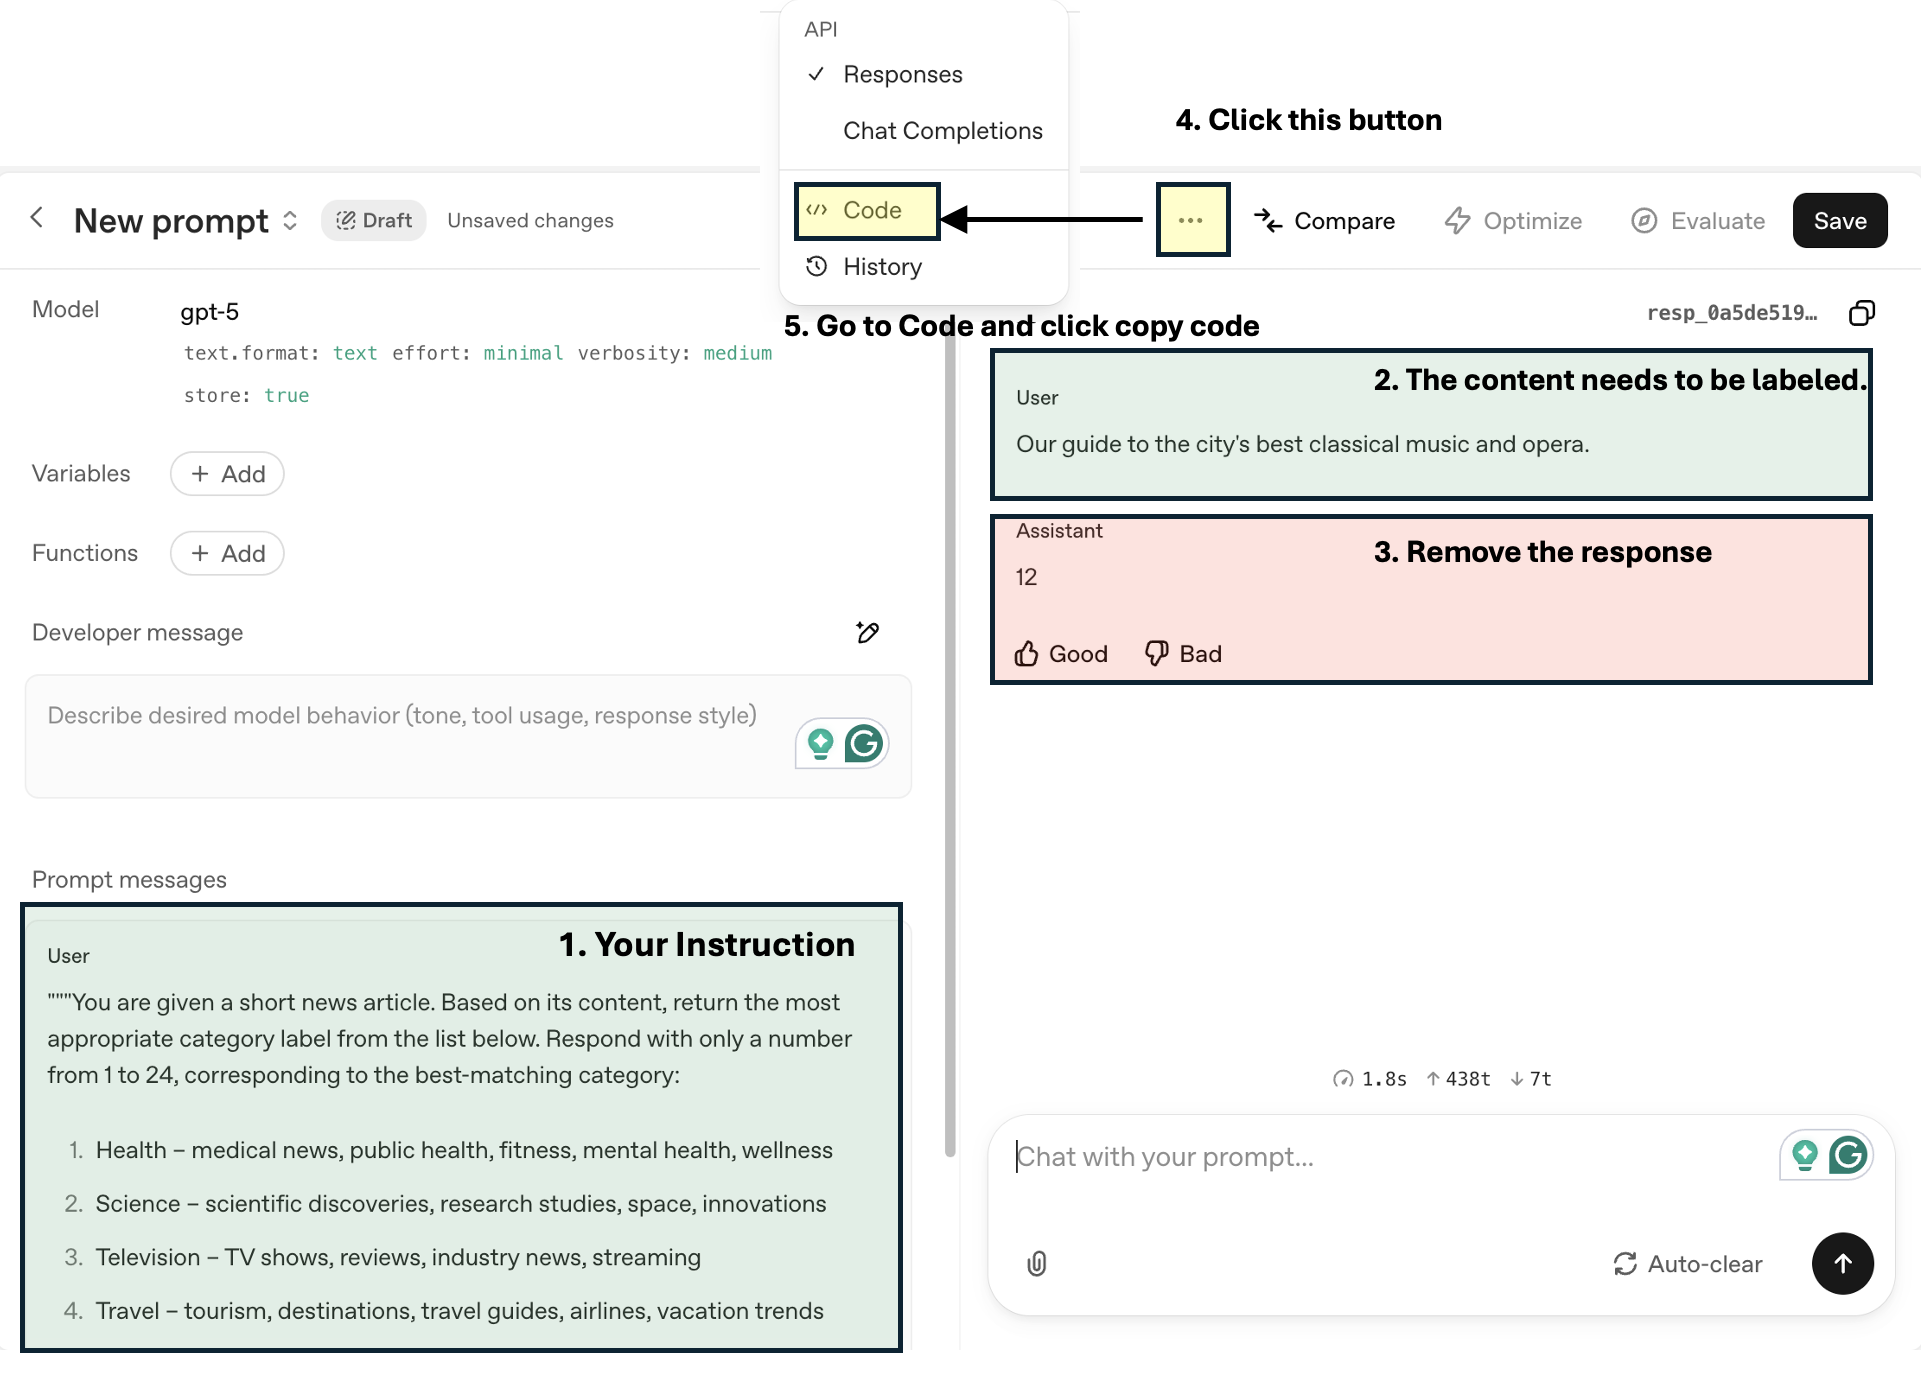



In [ ]:
import os
import time
import pandas as pd
from openai import OpenAI
from tqdm.auto import tqdm


# ── CONFIG ────────────────────────────────────────────────────────────────
os.environ["OPENAI_API_KEY"] = api_key
client = OpenAI()

# ── Testing (copied from OpenAI playground) ───────────────────────────────
from openai import OpenAI
client = OpenAI()

response = client.responses.create(
  model="gpt-5-nano",
  input=[
    {
      "role": "user",
      "content": [
        {
          "type": "input_text",
          "text": "\"\"\"You are given a short news article. Based on its content, return the most appropriate category label from the list below. Respond with only a number from 1 to 24, corresponding to the best-matching category:\n\n1. Health – medical news, public health, fitness, mental health, wellness\n2. Science – scientific discoveries, research studies, space, innovations\n3. Television – TV shows, reviews, industry news, streaming\n4. Travel – tourism, destinations, travel guides, airlines, vacation trends\n5. Movies – film news, reviews, box office, upcoming releases\n6. Dance – ballet, contemporary styles, street dance, performances\n7. Real Estate – housing trends, property sales, architecture, urban planning\n8. Economy – macroeconomics, inflation, markets, GDP, financial policies\n9. Sports – competitions, athletes, Demo_results, professional sports\n10. Theater – plays, Broadway, live performances, stage reviews\n11. Opinion – editorials, commentary, analysis\n12. Music – albums, artists, concerts, festivals, music trends\n13. Books – literature, bestsellers, author interviews, book reviews\n14. Art & Design – fine arts, museums, exhibitions, visual/design trends\n15. Style – fashion trends, beauty, personal style, aesthetics\n16. Media – journalism, publishing, digital media, mass communication\n17. Food – restaurants, recipes, cooking, culinary culture\n18. Well – lifestyle, self-care, mental well-being, personal development\n19. Fashion – clothing, designers, fashion weeks, industry insights\n20. Technology – AI, gadgets, software, cybersecurity, tech innovations\n21. Your Money – personal finance, investing, budgeting, financial planning\n22. Education – schools, universities, learning methods, education policies\n23. Automobiles – car news, EVs, reviews, industry trends\n24. Global Business – international trade, corporations, mergers, global markets\n\nReturn the complete label only (e.g., 1), no extra words.\"\"\""
        }
      ]
    },
    {
      "role": "user",
      "content": [
        {
          "type": "input_text",
          "text": "Our guide to the city's best classical music and opera.\n\n"
        }
      ]
    }
  ],
  text={
    "format": {
      "type": "text"
    },
    "verbosity": "medium"
  },
  reasoning={
    "effort": "minimal"
  },
  tools=[],
  store=True,
  include=[
    "reasoning.encrypted_content",
    "web_search_call.action.sources"
  ]
)

In [ ]:
# Preview the response
response

Response(id='resp_0692feaa0b3488f10068f56dbd99348193aa8a4aa93b0576ff', created_at=1760914877.0, error=None, incomplete_details=None, instructions=None, metadata={}, model='gpt-5-nano-2025-08-07', object='response', output=[ResponseReasoningItem(id='rs_0692feaa0b3488f10068f56dbeadc481939fd6213bca297066', summary=[], type='reasoning', content=None, encrypted_content='gAAAAABo9W2_ZcINOxHDbrdsD9_yZBHhbxLHj4EZHZd6_ddDrpq_xfx3mSng2QUKijI58sw97cexHGFbsT5T1nXYbGb2zLlChN14uCugecQP0xWGj9ecJDBjcOMuOsK2Y6Mi9g5eKzOa-0x3M3eb2QJ8I-sFFrWwp3q6B5ThTzcYGqcIAIdiEVp7nCxaUUvAaYQibCt1uFZohUDyBEPKKajB-JHxC6d7mYkQqYwKjtp2HBwwYleqKVyJAt6_RxUE4-oHuJiGksrRsAODS1SdPIaLwn4x7G2iAjuVTJTDQ0SKlHUTB9l8lsfMbKw-dYVSTp6H6ZtJsCoRW5ACQv6YgR0ke3E3rRcyL7qy9d3KVkJFiKo4xDxUG-OOMkgon0UFw0CEDRQmbZDWmj6YadVPwfzt8orlNbpzVb8r5c29UOx_hTBPENEPleQLJEQs04LHTL1d2ZKWqWyUhmzn9IzCFlbyLImdie8nrOkNUNyUkxaGHQfwRFc4zxSiIAO7sXXTtn5Y4tkt-7Z-6Euc79hedG3Eg6SWmeC-KZR8jLP69gd46CskI2wnIljPZ89unajOFZx1pTQm16-6X8aqrUaU_qd5LHoFMYmY5VfDdk9vFU4LVRGJXntngYsD

In [ ]:
price_estimation (response,
                  num_rows = 1000,
                  input_cost_per_million = 0.05,
                  output_cost_per_million = 0.4,
                  num_votes = 3)

# https://openai.com/api/pricing/
# The price to proceed 1000 rows, using GPT-5-nano each do it three times for a majority vote, costs about only 0.74.


🧮 Estimated Cost for 3,000 calls (1,000 rows × 3 votes)
• Avg prompt tokens/call:     438
• Avg completion tokens/call: 7
• Pricing ($/1M tokens): prompt=$0.05, completion=$0.4
💰 Total: $0.0741    (±10% → $0.0667–$0.0815)



0.0741

####**GPT - Demo 1a: text labeling**



> **Example 1: [GPT-4.1](https://platform.openai.com/docs/models/gpt-4.1):**  
> GPT-4.1 is a **smart, instruction-following model** with good tool-calling capability and broad knowledge across domains.  
> It supports **text + image input**, **text output**, and up to a **1M-token context window** (32k max output).  
> Pricing at the time of writing: **$2 / 1M input tokens** and **$8 / 1M output tokens**.  
>  
> **Access Rate Limit:**  
> The authors of this demo are using **Tier 5 (most advanced)** API access — this tier offers very high **RPM (requests per minute)** and **TPM (tokens per minute)** limits, so rate limits are rarely an issue.  
>  
> If you are on a **lower tier**, you may hit rate limits sooner. Check your [usage tier and limits here](https://platform.openai.com/account/limits).  
> - Tier 1 → 500 RPM, 30k TPM  
> - Tier 2 → 5k RPM, 450k TPM  
> - Tier 3 → 5k RPM, 800k TPM  
> - Tier 4 → 10k RPM, 2M TPM  
> - Tier 5 → 10k RPM, 30M TPM  
>
> If your tier’s **RPM/TPM is lower** than your planned workload, you can:  
> - **Request a higher tier** (automatic upgrades happen as spend increases).  
> - **Throttle your calls** by setting a `wait_time` peremater (i.e., sleep between requests in your code).  
>   Adjust `wait_time = 60 / your_allowed_RPM` to stay within your tier’s limits.



In [ ]:
D1a_GPT_41_inital_lableing = classification_GPT(
    text_path="Demo_data/D1_1.csv",
    category=category_D1_GPT,
    prompt=prompt_D1_GPT,
    column_4_labeling=["headline", "abstract"],
    model="gpt-4.1-mini",
    api_key=api_key,
    temperature=1,
    mode="text",
    output_column_name="D1a_GPT_41_inital_lableing",
    num_themes=1,
    num_votes=3,
    wait_time=5.0
)

D1a_GPT_41_inital_lableing.to_csv("Demo_result/D1a_GPT_41_inital_lableing.csv", index=False)

2025-10-19 23:02:42.378 | INFO     | labelgenius.LabelGenius:print_env_info:101 - [ENV] Python: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
2025-10-19 23:02:42.381 | INFO     | labelgenius.LabelGenius:print_env_info:102 - [ENV] OpenAI SDK: 1.109.1
2025-10-19 23:02:42.382 | INFO     | labelgenius.LabelGenius:print_env_info:103 - [ENV] Platform: Linux-6.6.105+-x86_64-with-glibc2.35
[ GPT • text_class ] 100%|█████████████████████████| 48/48 | ETA 00:00 |  5.68s/row | , ⚡ cache: 0 


✅ Finished classification of 48 rows.


In [ ]:
## Check the accuracy: GPT 41 inital labeling
D1a_GPT_41_inital_lableing['D1a_GPT_41_inital_lableing'] = pd.to_numeric(D1a_GPT_41_inital_lableing['D1a_GPT_41_inital_lableing'], errors='coerce')
D1a_GPT_41_inital_lableing['section_numeric'] = pd.to_numeric(D1a_GPT_41_inital_lableing['section_numeric'], errors='coerce')

auto_verification(
    D1a_GPT_41_inital_lableing,
    predicted_cols="D1a_GPT_41_inital_lableing",
    true_cols="section_numeric",
    category=category_D1_GPT
)


== Verification of 'D1a_GPT_41_inital_lableing' vs. 'section_numeric' ==
Accuracy:   70.83%
Macro F1:   67.44%
Micro  F1:  70.83%

Full classification report:
              precision    recall  f1-score   support

           1       0.20      0.50      0.29         2
           2       0.67      1.00      0.80         2
           3       0.67      1.00      0.80         2
           4       1.00      1.00      1.00         2
           5       1.00      0.50      0.67         2
           6       1.00      1.00      1.00         2
           7       0.67      1.00      0.80         2
           8       0.67      1.00      0.80         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       0.00      0.00      0.00         2
          12       1.00      1.00      1.00         2
          13       1.00      0.50      0.67         2
          14       0.67      1.00      0.80         2
          15       0.00      

{'D1a_GPT_41_inital_lableing vs section_numeric': {'accuracy': 0.7083333333333334,
  'precision_macro': 0.6819444444444445,
  'recall_macro': 0.7083333333333334,
  'f1_macro': 0.674404761904762,
  'precision_micro': 0.7083333333333334,
  'recall_micro': 0.7083333333333334,
  'f1_micro': 0.7083333333333334,
  'report': '              precision    recall  f1-score   support\n\n           1       0.20      0.50      0.29         2\n           2       0.67      1.00      0.80         2\n           3       0.67      1.00      0.80         2\n           4       1.00      1.00      1.00         2\n           5       1.00      0.50      0.67         2\n           6       1.00      1.00      1.00         2\n           7       0.67      1.00      0.80         2\n           8       0.67      1.00      0.80         2\n           9       1.00      1.00      1.00         2\n          10       1.00      1.00      1.00         2\n          11       0.00      0.00      0.00         2\n          12     

> **Example 2: [GPT-5](https://platform.openai.com/docs/models/gpt-5):**  
> GPT-5 is a **flagship model** for **coding, reasoning, and agentic tasks** across domains.  
> It supports **text + image input**, **text output**, and up to a **400k-token context window** (128k max output).  
> Pricing at the time of writing: **$1.25 / 1M input tokens** and **$10 / 1M output tokens** (batch API and cached input are discounted).  
>  
> **Usage Modes:**  
> - **Non-reasoning mode** → set `reasoning_effort="minimal"` (fastest, cheaper, great for straightforward classification or retrieval).  
> - **Reasoning mode** → set `reasoning_effort="medium"` (slower but better at complex reasoning and multi-step analysis).  
>  
> **Access Rate Limit:**  
> The authors of this demo are using **Tier 5 (most advanced)** API access — this tier offers very high **RPM (requests per minute)** and **TPM (tokens per minute)** limits, so rate limits are rarely an issue.  
>  
> If you are on a **lower tier**, you may hit rate limits sooner. Check your [usage tier and limits here](https://platform.openai.com/account/limits).  
> - Tier 1 → 500 RPM, 500k TPM  
> - Tier 2 → 5k RPM, 1M TPM  
> - Tier 3 → 5k RPM, 2M TPM  
> - Tier 4 → 10k RPM, 4M TPM  
> - Tier 5 → 15k RPM, 40M TPM  
>
> If your tier’s **RPM/TPM is lower** than your planned workload, you can:  
> - **Request a higher tier** (automatic upgrades happen as spend increases).  
> - **Throttle your calls** by setting a `wait_time` parameter (sleep between requests in your code).  
>   Adjust `wait_time = 60 / your_allowed_RPM` to stay within your tier’s limits.  
*italicized text*

In [ ]:
# --- Initial labeling with GPT-5 (non-reasoning mode) ---
D1a_GPT_5_inital_labeling = classification_GPT(
    text_path="Demo_data/D1_1.csv",
    category=category_D1_GPT,
    prompt=prompt_D1_GPT,
    column_4_labeling=["headline", "abstract"],
    model="gpt-5-nano",                # switched to GPT-5
    api_key=api_key,
    reasoning_effort="minimal",   # non-reasoning mode
    mode="text",
    output_column_name="D1a_GPT_5_inital_labeling",
    num_themes=1,
    num_votes=3,
    wait_time=5.0                 # keep your wait time if needed
)

# Save the labeling result
D1a_GPT_5_inital_labeling.to_csv(
    "Demo_result/D1a_GPT_5_inital_labeling.csv", index=False
)

# --- Check the accuracy ---
D1a_GPT_5_inital_labeling['D1a_GPT_5_inital_labeling'] = pd.to_numeric(
    D1a_GPT_5_inital_labeling['D1a_GPT_5_inital_labeling'], errors='coerce'
)
D1a_GPT_5_inital_labeling['section_numeric'] = pd.to_numeric(
    D1a_GPT_5_inital_labeling['section_numeric'], errors='coerce'
)

auto_verification(
    D1a_GPT_5_inital_labeling,
    predicted_cols="D1a_GPT_5_inital_labeling",
    true_cols="section_numeric",
    category=category_D1_GPT
)


2025-10-19 23:07:15.236 | INFO     | labelgenius.LabelGenius:print_env_info:101 - [ENV] Python: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
2025-10-19 23:07:15.238 | INFO     | labelgenius.LabelGenius:print_env_info:102 - [ENV] OpenAI SDK: 1.109.1
2025-10-19 23:07:15.239 | INFO     | labelgenius.LabelGenius:print_env_info:103 - [ENV] Platform: Linux-6.6.105+-x86_64-with-glibc2.35
[ GPT • text_class ] 100%|█████████████████████████| 48/48 | ETA 00:00 |  6.33s/row | , ⚡ cache: 0 


✅ Finished classification of 48 rows.

== Verification of 'D1a_GPT_5_inital_labeling' vs. 'section_numeric' ==
Accuracy:   60.42%
Macro F1:   56.67%
Micro  F1:  60.42%

Full classification report:
              precision    recall  f1-score   support

           1       0.33      0.50      0.40         2
           2       0.67      1.00      0.80         2
           3       0.50      1.00      0.67         2
           4       0.00      0.00      0.00         2
           5       1.00      0.50      0.67         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       0.00      0.00      0.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       0.00      0.00      0.00         2
          12       1.00      1.00      1.00         2
          13       0.00      0.00      0.00         2
          14       0.67      1.00      0.80  

{'D1a_GPT_5_inital_labeling vs section_numeric': {'accuracy': 0.6041666666666666,
  'precision_macro': 0.5833333333333334,
  'recall_macro': 0.6041666666666666,
  'f1_macro': 0.5666666666666665,
  'precision_micro': 0.6041666666666666,
  'recall_micro': 0.6041666666666666,
  'f1_micro': 0.6041666666666666,
  'report': '              precision    recall  f1-score   support\n\n           1       0.33      0.50      0.40         2\n           2       0.67      1.00      0.80         2\n           3       0.50      1.00      0.67         2\n           4       0.00      0.00      0.00         2\n           5       1.00      0.50      0.67         2\n           6       1.00      1.00      1.00         2\n           7       1.00      1.00      1.00         2\n           8       0.00      0.00      0.00         2\n           9       1.00      1.00      1.00         2\n          10       1.00      1.00      1.00         2\n          11       0.00      0.00      0.00         2\n          12     

In [ ]:
# --- Initial labeling with GPT-5 (reasoning mode) ---
D1a_GPT_5_reasoning_labeling = classification_GPT(
    text_path="Demo_data/D1_1.csv",
    category=category_D1_GPT,
    prompt=prompt_D1_GPT,
    column_4_labeling=["headline", "abstract"],
    model="gpt-5-nano",                # GPT-5 model
    api_key=api_key,
    reasoning_effort="medium",    # reasoning mode
    mode="text",
    output_column_name="D1a_GPT_5_reasoning_labeling",
    num_themes=1,
    num_votes=3,
    wait_time=5.0                 # keep if you need throttling
)

# Save the labeling result
D1a_GPT_5_reasoning_labeling.to_csv(
    "Demo_result/D1a_GPT_5_reasoning_labeling.csv", index=False
)

# --- Check the accuracy ---
D1a_GPT_5_reasoning_labeling['D1a_GPT_5_reasoning_labeling'] = pd.to_numeric(
    D1a_GPT_5_reasoning_labeling['D1a_GPT_5_reasoning_labeling'], errors='coerce'
)
D1a_GPT_5_reasoning_labeling['section_numeric'] = pd.to_numeric(
    D1a_GPT_5_reasoning_labeling['section_numeric'], errors='coerce'
)

auto_verification(
    D1a_GPT_5_reasoning_labeling,
    predicted_cols="D1a_GPT_5_reasoning_labeling",
    true_cols="section_numeric",
    category=category_D1_GPT
)


2025-10-19 23:12:19.441 | INFO     | labelgenius.LabelGenius:print_env_info:101 - [ENV] Python: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
2025-10-19 23:12:19.443 | INFO     | labelgenius.LabelGenius:print_env_info:102 - [ENV] OpenAI SDK: 1.109.1
2025-10-19 23:12:19.444 | INFO     | labelgenius.LabelGenius:print_env_info:103 - [ENV] Platform: Linux-6.6.105+-x86_64-with-glibc2.35
[ GPT • text_class ] 100%|█████████████████████████| 48/48 | ETA 00:00 |  7.35s/row | , ⚡ cache: 0 


✅ Finished classification of 48 rows.

== Verification of 'D1a_GPT_5_reasoning_labeling' vs. 'section_numeric' ==
Accuracy:   72.92%
Macro F1:   71.75%
Micro  F1:  72.92%

Full classification report:
              precision    recall  f1-score   support

           1       0.20      0.50      0.29         2
           2       0.67      1.00      0.80         2
           3       0.50      1.00      0.67         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       0.50      0.50      0.50         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      0.50      0.67         2
          12       1.00      1.00      1.00         2
          13       1.00      0.50      0.67         2
          14       1.00      1.00      1.0

{'D1a_GPT_5_reasoning_labeling vs section_numeric': {'accuracy': 0.7291666666666666,
  'precision_macro': 0.7513888888888888,
  'recall_macro': 0.7291666666666666,
  'f1_macro': 0.7174603174603175,
  'precision_micro': 0.7291666666666666,
  'recall_micro': 0.7291666666666666,
  'f1_micro': 0.7291666666666666,
  'report': '              precision    recall  f1-score   support\n\n           1       0.20      0.50      0.29         2\n           2       0.67      1.00      0.80         2\n           3       0.50      1.00      0.67         2\n           4       1.00      1.00      1.00         2\n           5       1.00      1.00      1.00         2\n           6       1.00      1.00      1.00         2\n           7       1.00      1.00      1.00         2\n           8       0.50      0.50      0.50         2\n           9       1.00      1.00      1.00         2\n          10       1.00      1.00      1.00         2\n          11       1.00      0.50      0.67         2\n          12  

####**GPT – Demo 1a (Fine-Tune): Text Labeling**


Fine-Tuning GPT Models

- Fine-tuning should be done on **snapshot models** (e.g., `gpt-4.1-2025-04-14` or `gpt-4.1-mini-2025-04-14`) to preserve the model’s state at the time of training.  
  This ensures **consistent behavior** and allows incremental updates over time.

- **Fine-tuning is not yet supported for reasoning models** (e.g., `gpt-o4-mini-deep-research`, **GPT-5**).  
  Support for fine-tuning on reasoning models may be added in the future as the API evolves.

---

Minimum Data Requirements

Fine-tuning GPT-4.1 begins to show **effective learning** with about **20 or more examples per category**.  
Datasets significantly smaller than this may not provide enough signal for the model to learn nuanced distinctions.

---

Poor Performance on Tiny Datasets

With very small datasets, the optimizer may converge on simply predicting the **majority label** to minimize loss.  
This does **not represent true learning** — it reflects a **bias toward frequent labels** rather than understanding contextual differences.

**For small data scenarios, consider:**
- Using **zero-shot** or **few-shot prompting** instead of fine-tuning.  
- Applying **data augmentation** to increase sample size.  
- Trying **instruction tuning** before full fine-tuning if possible.

**Note:**  
If the results of your fine-tuning appear **less accurate or useful than expected**, this is often because the **training dataset is limited or not fully representative** of the real-world inputs you plan to label.  
Model performance improves when:
- The training set includes **enough examples per category** (at least ~20+ each).  
- The data reflects the **diversity and complexity** of the actual inputs the model will encounter.  
If your dataset is very small or narrow, the fine-tuned model may overfit or fail to generalize well.

---

**GPT Fine-Tune Hyperparameters**

Batch Size Considerations

The batch size determines how many samples are processed at once. Larger batch sizes may speed up training but can lead to instability, especially with limited data.

| Dataset Size         | Recommended `batch_size` |
|----------------------|--------------------------|
| **< 1,000 samples**  | `4`                      |
| **1,000 – 10,000**   | `8` or `16`              |
| **> 10,000**         | `32`                     |
| **> 100,000**        | `64`                     |

**Caution:**
- Increasing batch size can lead to overfitting if the data is not diverse.
- If training loss is unstable, try lowering the batch size.

---

Learning Rate Multiplier

The learning rate multiplier scales the model’s base learning rate.  
A value of `0.1` means the effective learning rate is 10% of the default.

| Data Type                                                   | Recommended Multiplier |
|------------------------------------------------------------|------------------------|
| High-variance text (e.g., news articles, social posts)      | `0.02 – 0.05`          |
| Domain-specific text (e.g., scientific abstracts)           | `0.02 – 0.10`          |
| Noisy or mixed-domain text (e.g., user-generated content)   | `0.01 – 0.02`          |
| Highly structured text (e.g., technical manuals)            | `0.05 – 0.10`          |

**Caution:**
- If loss suddenly spikes, reduce the multiplier.
- If the model underfits (low accuracy and low loss), slightly increase the multiplier.
- Avoid values greater than `0.1` unless the data is very clean and structured.


In [ ]:
# Prepare the data for GPT-4.1
# The JSONL should have three parts:
# 1. system_prompt: coding instruction
# 2. input_col: The information needed to be labeled
# 3. label_col: the label


generate_GPT_finetune_jsonl(
    D1a_GPT_41_inital_lableing,
    output_path="Demo_result/D1a_GPT_41_inital_lableing.jsonl",
    system_prompt=prompt_D1_GPT,
    input_col=["headline", "abstract"],
    label_col=["section_numeric"]
)


In [ ]:
# Fine-tune GPT-41
D1a_GPT_41_model_finetune = finetune_GPT(
    training_file_path="Demo_result/D1a_GPT_41_inital_lableing.jsonl",
    model="gpt-4.1-2025-04-14",
    hyperparameters={"batch_size":8, "learning_rate_multiplier":0.01},
    api_key= api_key
)

Started fine-tune job ftjob-1tZfBkAj0yO86GeaBlSnk975
[0s] status=validating_files
[15s] status=validating_files
[30s] status=validating_files
[45s] status=validating_files
[60s] status=validating_files
[75s] status=queued
[90s] status=running
[105s] status=running
[120s] status=running
[135s] status=running
[150s] status=running
[165s] status=running
[180s] status=running
[195s] status=running
[210s] status=running
[225s] status=running
[240s] status=running
[255s] status=running
[270s] status=running
[285s] status=running
[300s] status=running
[315s] status=running
[330s] status=running
[345s] status=running
[360s] status=running
[375s] status=running
[390s] status=running
[405s] status=running
[420s] status=running
[435s] status=running
[450s] status=running
[465s] status=running
[480s] status=running
[495s] status=running
[510s] status=running
[525s] status=running
[540s] status=running
[555s] status=running
[570s] status=running
[585s] status=running
[600s] status=running
[615s] st

In [ ]:
D1a_GPT_41_model_finetune = "ft:gpt-4.1-2025-04-14:jcs-research::CSXWMPxi"

**Note:**
You *can* make your code wait until the job status becomes `finished`. However, because fine-tuning can take a long time, we chose **not** to block the code. Instead, we wait until we receive an email notification from OpenAI confirming completion.

You will get an email similar to the following once the fine-tuning job is done:

> **Subject:** Your fine-tuning job has completed

> **Body:** Your fine-tuning job `ftjob-xxxx` has successfully completed, and a new model `ft:xxxxx:xxx::xxxx` has been created for your use.

Copy this model identifier and set it as the `model` parameter in `classification_GPT()`.

In [ ]:
# Classify with fine‑tuned 4 model
D1a_GPT_41_finetune = classification_GPT(
    text_path="Demo_data/D1_2.csv",
    category = category_D1_GPT,
    prompt = prompt_D1_GPT,
    column_4_labeling=["headline", "abstract"],
    model = D1a_GPT_41_model_finetune,
    api_key = api_key,
    temperature = 1,
    mode = "text",
    output_column_name="D1_GPT_41_finetune",
    num_themes = 1,
    num_votes = 1)



D1a_GPT_41_finetune.to_csv("Demo_result/D1_GPT_41_finetune.csv", index=False)

2025-10-20 01:45:29.364 | INFO     | labelgenius.LabelGenius:print_env_info:101 - [ENV] Python: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
2025-10-20 01:45:29.365 | INFO     | labelgenius.LabelGenius:print_env_info:102 - [ENV] OpenAI SDK: 1.109.1
2025-10-20 01:45:29.367 | INFO     | labelgenius.LabelGenius:print_env_info:103 - [ENV] Platform: Linux-6.6.105+-x86_64-with-glibc2.35
[ GPT • text_class ] 100%|█████████████████████████| 48/48 | ETA 00:00 |  4.28s/row | , ⚡ cache: 0 


✅ Finished classification of 48 rows.


In [ ]:
## Check the accuracy: GPT 4.1 fientune
auto_verification(
    D1a_GPT_41_finetune,
    predicted_cols="D1_GPT_41_finetune",
    true_cols="section_numeric",
    category=category_D1_GPT
);


== Verification of 'D1_GPT_41_finetune' vs. 'section_numeric' ==
Accuracy:   72.92%
Macro F1:   70.58%
Micro  F1:  72.92%

Full classification report:
              precision    recall  f1-score   support

           1       0.40      1.00      0.57         2
           2       1.00      1.00      1.00         2
           3       0.67      1.00      0.80         2
           4       1.00      0.50      0.67         2
           5       1.00      1.00      1.00         2
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         2
           8       0.67      1.00      0.80         2
           9       0.50      0.50      0.50         2
          10       1.00      0.50      0.67         2
          11       0.00      0.00      0.00         2
          12       1.00      1.00      1.00         2
          13       1.00      0.50      0.67         2
          14       0.67      1.00      0.80         2
          15       1.00      0.50    

> ⚠️ **Performance note:**
> The fine-tuned model shown here may perform worse than expected because it was trained with **only ~20 samples per category** for demonstration purposes. Fine-tuning generally requires **at least ~20 examples per category** (often more) to achieve reliable performance. Very small datasets can cause the model to overfit or default to predicting majority labels rather than learning meaningful distinctions.


####**GPT - Demo 1b: image labeling**


In [ ]:
# Update the promot from based on text to image

prompt_D1_image_GPT = ["""You are given a image. Based on its content, return the most appropriate category label from the list below. Respond with only a number from 1 to 24, corresponding to the best-matching category:

1. Health – medical news, public health, fitness, mental health, wellness
2. Science – scientific discoveries, research studies, space, innovations
3. Television – TV shows, reviews, industry news, streaming
4. Travel – tourism, destinations, travel guides, airlines, vacation trends
5. Movies – film news, reviews, box office, upcoming releases
6. Dance – ballet, contemporary styles, street dance, performances
7. Real Estate – housing trends, property sales, architecture, urban planning
8. Economy – macroeconomics, inflation, markets, GDP, financial policies
9. Sports – competitions, athletes, Demo_results, professional sports
10. Theater – plays, Broadway, live performances, stage reviews
11. Opinion – editorials, commentary, analysis
12. Music – albums, artists, concerts, festivals, music trends
13. Books – literature, bestsellers, author interviews, book reviews
14. Art & Design – fine arts, museums, exhibitions, visual/design trends
15. Style – fashion trends, beauty, personal style, aesthetics
16. Media – journalism, publishing, digital media, mass communication
17. Food – restaurants, recipes, cooking, culinary culture
18. Well – lifestyle, self-care, mental well-being, personal development
19. Fashion – clothing, designers, fashion weeks, industry insights
20. Technology – AI, gadgets, software, cybersecurity, tech innovations
21. Your Money – personal finance, investing, budgeting, financial planning
22. Education – schools, universities, learning methods, education policies
23. Automobiles – car news, EVs, reviews, industry trends
24. Global Business – international trade, corporations, mergers, global markets

Return the categorty label only (e.g., 5), no extra words."""]

**Example 1: [GPT-4.1](https://platform.openai.com/docs/models/gpt-4.1):**


In [ ]:
# --- Initial labeling with GPT-4.1 (image-only, non-reasoning with temperature=1) ---
D1b_GPT_41_inital_labeling = classification_GPT(
    image_dir="Demo_data/D1_imgs_1",
    category=category_D1_GPT,
    prompt=prompt_D1_image_GPT,
    model="gpt-4.1-mini",              # GPT-4.1 model
    api_key=api_key,
    temperature=1,                # non-reasoning temperature
    mode="image",                 # image-only
    output_column_name="D1b_GPT_41_inital_labeling",
    num_themes=1,
    num_votes=1,
    batch_size=1,
    wait_time=1                   # avoid 429 rate_limit_exceeded
)

D1b_GPT_41_inital_labeling.to_csv(
    "Demo_result/D1b_GPT_41_inital_labeling.csv", index=False
)



2025-10-20 01:48:55.122 | INFO     | labelgenius.LabelGenius:print_env_info:101 - [ENV] Python: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
2025-10-20 01:48:55.123 | INFO     | labelgenius.LabelGenius:print_env_info:102 - [ENV] OpenAI SDK: 1.109.1
2025-10-20 01:48:55.125 | INFO     | labelgenius.LabelGenius:print_env_info:103 - [ENV] Platform: Linux-6.6.105+-x86_64-with-glibc2.35
[ GPT • image_class ] 100%|████████████████████████| 48/48 | ETA 00:00 |  1.92s/row | , ⚡ cache: 0 



✅ Finished classification of 48 rows.


In [ ]:
D1b_GPT_41_inital_labeling

,image_id,image_dir,text_content,image_data_url,final_input,D1b_GPT_41_inital_labeling,D1b_GPT_41_inital_labeling_raw,D1b_GPT_41_inital_labeling_1
0,6f9aeeee-f829-58d2-9787-4f90f4ca1954,Demo_data/D1_imgs_1/6f9aeeee-f829-58d2-9787-4f...,,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...",3,[3],3
1,850f85e4-f663-5e8c-b503-9d4e578b885f,Demo_data/D1_imgs_1/850f85e4-f663-5e8c-b503-9d...,,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...",8,[8],8
2,ad602611-1be6-551d-8331-ed6565db7169,Demo_data/D1_imgs_1/ad602611-1be6-551d-8331-ed...,,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQEBLAE...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQEBLAE...",12,[12],12
3,4b7b6bef-8377-59bf-bcc9-f122af08ef8a,Demo_data/D1_imgs_1/4b7b6bef-8377-59bf-bcc9-f1...,,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...",2,[2],2
4,f63e029a-26d3-5691-a39c-2641e9d093f9,Demo_data/D1_imgs_1/f63e029a-26d3-5691-a39c-26...,,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...",11,[11],11
5,c279fc6a-522d-57b2-a1b1-b4d75a92cfa6,Demo_data/D1_imgs_1/c279fc6a-522d-57b2-a1b1-b4...,,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...",22,[22],22
6,76b2b0e9-8a46-57cf-9168-d7fa2d6795b6,Demo_data/D1_imgs_1/76b2b0e9-8a46-57cf-9168-d7...,,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...",24,[24],24
7,1c78fb-c3ea-5229-828c-9189692aa9db,Demo_data/D1_imgs_1/1c78fb-c3ea-5229-828c-9189...,,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQEBLAE...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQEBLAE...",17,[17],17
8,c5f2816b-baf5-5ce0-87a6-2f9978d371e4,Demo_data/D1_imgs_1/c5f2816b-baf5-5ce0-87a6-2f...,,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...",16,[16],16
9,eb0db1eb-00e9-5527-b768-8a17dce302c6,Demo_data/D1_imgs_1/eb0db1eb-00e9-5527-b768-8a...,,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...",11,[11],11


In [ ]:
# --- Merge the data with the file with ground truth ---
ground_truth = pd.read_csv("Demo_data/D1_1.csv")
D1b_GPT_41_inital_labeling = pd.merge(
    D1b_GPT_41_inital_labeling,
    ground_truth,
    on="image_id",
    how="left"
)
# --- Check the accuracy ---
D1b_GPT_41_inital_labeling['D1b_GPT_41_inital_labeling'] = pd.to_numeric(
    D1b_GPT_41_inital_labeling['D1b_GPT_41_inital_labeling'], errors='coerce'
)


auto_verification(
    D1b_GPT_41_inital_labeling,
    predicted_cols="D1b_GPT_41_inital_labeling",
    true_cols="section_numeric",
    category=category_D1_GPT
)




== Verification of 'D1b_GPT_41_inital_labeling' vs. 'section_numeric' ==
Accuracy:   45.83%
Macro F1:   44.17%
Micro  F1:  45.83%

Full classification report:
              precision    recall  f1-score   support

           1       0.25      0.50      0.33         2
           2       0.25      1.00      0.40         2
           3       0.33      0.50      0.40         2
           4       1.00      1.00      1.00         2
           5       0.00      0.00      0.00         2
           6       1.00      1.00      1.00         2
           7       0.25      0.50      0.33         2
           8       0.00      0.00      0.00         2
           9       1.00      1.00      1.00         2
          10       1.00      0.50      0.67         2
          11       0.00      0.00      0.00         2
          12       1.00      1.00      1.00         2
          13       1.00      0.50      0.67         2
          14       1.00      0.50      0.67         2
          15       0.00      

{'D1b_GPT_41_inital_labeling vs section_numeric': {'accuracy': 0.4583333333333333,
  'precision_macro': 0.4895833333333333,
  'recall_macro': 0.4583333333333333,
  'f1_macro': 0.4416666666666666,
  'precision_micro': 0.4583333333333333,
  'recall_micro': 0.4583333333333333,
  'f1_micro': 0.4583333333333333,
  'report': '              precision    recall  f1-score   support\n\n           1       0.25      0.50      0.33         2\n           2       0.25      1.00      0.40         2\n           3       0.33      0.50      0.40         2\n           4       1.00      1.00      1.00         2\n           5       0.00      0.00      0.00         2\n           6       1.00      1.00      1.00         2\n           7       0.25      0.50      0.33         2\n           8       0.00      0.00      0.00         2\n           9       1.00      1.00      1.00         2\n          10       1.00      0.50      0.67         2\n          11       0.00      0.00      0.00         2\n          12    

**Example 2: [GPT-5](https://platform.openai.com/docs/models/gpt-5):**

In [ ]:
# --- Initial labeling with GPT-5 (image-only, non-reasoning) ---
D1b_GPT_5_inital_labeling = classification_GPT(
    image_dir="Demo_data/D1_imgs_1",
    category=category_D1_GPT,
    prompt=prompt_D1_image_GPT,
    column_4_labeling=["headline", "abstract"],
    model="gpt-5-nano",                 # GPT-5 model
    api_key=api_key,
    reasoning_effort="minimal",    # non-reasoning mode
    mode="image",                  # image-only
    output_column_name="D1b_GPT_5_inital_labeling",
    num_themes=1,
    num_votes=1,
    batch_size=1,
    wait_time=1                    # avoid 429 rate_limit_exceeded
)

D1b_GPT_5_inital_labeling.to_csv(
    "Demo_result/D1b_GPT_5_inital_labeling.csv", index=False
)

# --- Check the accuracy ---
D1b_GPT_5_inital_labeling = pd.merge(
    D1b_GPT_5_inital_labeling,
    ground_truth,
    on="image_id",
    how="left"
)
D1b_GPT_5_inital_labeling['D1b_GPT_5_inital_labeling'] = pd.to_numeric(
    D1b_GPT_5_inital_labeling['D1b_GPT_5_inital_labeling'], errors='coerce'
)
D1b_GPT_5_inital_labeling['section_numeric'] = pd.to_numeric(
    D1b_GPT_5_inital_labeling['section_numeric'], errors='coerce'
)

auto_verification(
    D1b_GPT_5_inital_labeling,
    predicted_cols="D1b_GPT_5_inital_labeling",
    true_cols="section_numeric",
    category=category_D1_GPT
)


2025-10-20 01:50:28.853 | INFO     | labelgenius.LabelGenius:print_env_info:101 - [ENV] Python: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
2025-10-20 01:50:28.855 | INFO     | labelgenius.LabelGenius:print_env_info:102 - [ENV] OpenAI SDK: 1.109.1
2025-10-20 01:50:28.856 | INFO     | labelgenius.LabelGenius:print_env_info:103 - [ENV] Platform: Linux-6.6.105+-x86_64-with-glibc2.35
[ GPT • image_class ] 100%|████████████████████████| 48/48 | ETA 00:00 |  2.98s/row | , ⚡ cache: 0 



✅ Finished classification of 48 rows.

== Verification of 'D1b_GPT_5_inital_labeling' vs. 'section_numeric' ==
Accuracy:   35.42%
Macro F1:   33.97%
Micro  F1:  35.42%

Full classification report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.67      1.00      0.80         2
           3       0.00      0.00      0.00         2
           4       1.00      0.50      0.67         2
           5       0.00      0.00      0.00         2
           6       1.00      1.00      1.00         2
           7       0.50      0.50      0.50         2
           8       0.00      0.00      0.00         2
           9       1.00      0.50      0.67         2
          10       1.00      0.50      0.67         2
          11       0.33      0.50      0.40         2
          12       0.25      0.50      0.33         2
          13       0.00      0.00      0.00         2
          14       1.00      1.00      1.00  

{'D1b_GPT_5_inital_labeling vs section_numeric': {'accuracy': 0.3541666666666667,
  'precision_macro': 0.38680555555555557,
  'recall_macro': 0.3541666666666667,
  'f1_macro': 0.33968253968253964,
  'precision_micro': 0.3541666666666667,
  'recall_micro': 0.3541666666666667,
  'f1_micro': 0.3541666666666667,
  'report': '              precision    recall  f1-score   support\n\n           1       0.00      0.00      0.00         2\n           2       0.67      1.00      0.80         2\n           3       0.00      0.00      0.00         2\n           4       1.00      0.50      0.67         2\n           5       0.00      0.00      0.00         2\n           6       1.00      1.00      1.00         2\n           7       0.50      0.50      0.50         2\n           8       0.00      0.00      0.00         2\n           9       1.00      0.50      0.67         2\n          10       1.00      0.50      0.67         2\n          11       0.33      0.50      0.40         2\n          12   

In [ ]:
# --- Initial labeling with GPT-5 (image-only, reasoning mode) ---
D1b_GPT_5_reasoning_labeling = classification_GPT(
    image_dir="Demo_data/D1_imgs_1",
    category=category_D1_GPT,
    prompt=prompt_D1_image_GPT,
    column_4_labeling=["headline", "abstract"],
    model="gpt-5-nano",                 # GPT-5 model
    api_key=api_key,
    reasoning_effort="medium",     # reasoning mode
    mode="image",                  # image-only
    output_column_name="D1b_GPT_5_reasoning_labeling",
    num_themes=1,
    num_votes=1,
    batch_size=1,
    wait_time=1                    # avoid 429 rate_limit_exceeded
)

D1b_GPT_5_reasoning_labeling.to_csv(
    "Demo_result/D1b_GPT_5_reasoning_labeling.csv", index=False
)

# --- Check the accuracy ---
D1b_GPT_5_reasoning_labeling = pd.merge(
    D1b_GPT_5_reasoning_labeling,
    ground_truth,
    on="image_id",
    how="left"
)
D1b_GPT_5_reasoning_labeling['D1b_GPT_5_reasoning_labeling'] = pd.to_numeric(
    D1b_GPT_5_reasoning_labeling['D1b_GPT_5_reasoning_labeling'], errors='coerce'
)
D1b_GPT_5_reasoning_labeling['section_numeric'] = pd.to_numeric(
    D1b_GPT_5_reasoning_labeling['section_numeric'], errors='coerce'
)

auto_verification(
    D1b_GPT_5_reasoning_labeling,
    predicted_cols="D1b_GPT_5_reasoning_labeling",
    true_cols="section_numeric",
    category=category_D1_GPT
)


2025-10-20 01:52:52.779 | INFO     | labelgenius.LabelGenius:print_env_info:101 - [ENV] Python: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
2025-10-20 01:52:52.780 | INFO     | labelgenius.LabelGenius:print_env_info:102 - [ENV] OpenAI SDK: 1.109.1
2025-10-20 01:52:52.781 | INFO     | labelgenius.LabelGenius:print_env_info:103 - [ENV] Platform: Linux-6.6.105+-x86_64-with-glibc2.35
[ GPT • image_class ] 100%|████████████████████████| 48/48 | ETA 00:00 |  4.63s/row | , ⚡ cache: 0 



✅ Finished classification of 48 rows.

== Verification of 'D1b_GPT_5_reasoning_labeling' vs. 'section_numeric' ==
Accuracy:   47.92%
Macro F1:   45.97%
Micro  F1:  47.92%

Full classification report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.50      1.00      0.67         2
           3       0.00      0.00      0.00         2
           4       1.00      1.00      1.00         2
           5       0.50      0.50      0.50         2
           6       1.00      1.00      1.00         2
           7       0.33      0.50      0.40         2
           8       0.00      0.00      0.00         2
           9       1.00      0.50      0.67         2
          10       0.50      0.50      0.50         2
          11       0.00      0.00      0.00         2
          12       1.00      1.00      1.00         2
          13       1.00      0.50      0.67         2
          14       0.67      1.00      0.8

{'D1b_GPT_5_reasoning_labeling vs section_numeric': {'accuracy': 0.4791666666666667,
  'precision_macro': 0.46875,
  'recall_macro': 0.4791666666666667,
  'f1_macro': 0.45972222222222214,
  'precision_micro': 0.4791666666666667,
  'recall_micro': 0.4791666666666667,
  'f1_micro': 0.4791666666666667,
  'report': '              precision    recall  f1-score   support\n\n           1       0.00      0.00      0.00         2\n           2       0.50      1.00      0.67         2\n           3       0.00      0.00      0.00         2\n           4       1.00      1.00      1.00         2\n           5       0.50      0.50      0.50         2\n           6       1.00      1.00      1.00         2\n           7       0.33      0.50      0.40         2\n           8       0.00      0.00      0.00         2\n           9       1.00      0.50      0.67         2\n          10       0.50      0.50      0.50         2\n          11       0.00      0.00      0.00         2\n          12       1.00 

####**GPT - Demo 1c: text-image pair labeling**


In [ ]:
# Update the promot from to image + text
prompt_D1_both_GPT = ["""You are given a news hreadline and abstract as well as an image. Based on its content, return the most appropriate category label from the list below. Respond with only a number from 1 to 24, corresponding to the best-matching category:

1. Health – medical news, public health, fitness, mental health, wellness
2. Science – scientific discoveries, research studies, space, innovations
3. Television – TV shows, reviews, industry news, streaming
4. Travel – tourism, destinations, travel guides, airlines, vacation trends
5. Movies – film news, reviews, box office, upcoming releases
6. Dance – ballet, contemporary styles, street dance, performances
7. Real Estate – housing trends, property sales, architecture, urban planning
8. Economy – macroeconomics, inflation, markets, GDP, financial policies
9. Sports – competitions, athletes, Demo_results, professional sports
10. Theater – plays, Broadway, live performances, stage reviews
11. Opinion – editorials, commentary, analysis
12. Music – albums, artists, concerts, festivals, music trends
13. Books – literature, bestsellers, author interviews, book reviews
14. Art & Design – fine arts, museums, exhibitions, visual/design trends
15. Style – fashion trends, beauty, personal style, aesthetics
16. Media – journalism, publishing, digital media, mass communication
17. Food – restaurants, recipes, cooking, culinary culture
18. Well – lifestyle, self-care, mental well-being, personal development
19. Fashion – clothing, designers, fashion weeks, industry insights
20. Technology – AI, gadgets, software, cybersecurity, tech innovations
21. Your Money – personal finance, investing, budgeting, financial planning
22. Education – schools, universities, learning methods, education policies
23. Automobiles – car news, EVs, reviews, industry trends
24. Global Business – international trade, corporations, mergers, global markets

Return the categorty label only (e.g., 5), no extra words."""]

**Example 1: [GPT-4.1](https://platform.openai.com/docs/models/gpt-4.1):**

In [ ]:
# --- Initial labeling with GPT-4.1 (text + image, non-reasoning with temperature=1) ---
D1c_GPT_41_inital_labeling = classification_GPT(
    text_path="Demo_data/D1_1.csv",
    image_dir="Demo_data/D1_imgs_1",
    category=category_D1_GPT,
    prompt=prompt_D1_both_GPT,
    column_4_labeling=["headline", "abstract"],
    model="gpt-4.1-mini",              # use GPT-4.1
    api_key=api_key,
    temperature=1,                # creativity / non-reasoning setting
    mode="both",                  # text + image
    output_column_name="D1c_GPT_41_inital_labeling",
    num_themes=1,
    num_votes=1,
    batch_size=1,
    wait_time=1                   # avoid 429 rate_limit_exceeded
)

# Save the labeling result
D1c_GPT_41_inital_labeling.to_csv(
    "Demo_result/D1c_GPT_41_inital_labeling.csv", index=False
)

# --- Check the accuracy ---
D1c_GPT_41_inital_labeling['D1c_GPT_41_inital_labeling'] = pd.to_numeric(
    D1c_GPT_41_inital_labeling['D1c_GPT_41_inital_labeling'], errors='coerce'
)
D1c_GPT_41_inital_labeling['section_numeric'] = pd.to_numeric(
    D1c_GPT_41_inital_labeling['section_numeric'], errors='coerce'
)

auto_verification(
    D1c_GPT_41_inital_labeling,
    predicted_cols="D1c_GPT_41_inital_labeling",
    true_cols="section_numeric",
    category=category_D1_GPT
)


2025-10-20 01:56:35.622 | INFO     | labelgenius.LabelGenius:print_env_info:101 - [ENV] Python: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
2025-10-20 01:56:35.624 | INFO     | labelgenius.LabelGenius:print_env_info:102 - [ENV] OpenAI SDK: 1.109.1
2025-10-20 01:56:35.625 | INFO     | labelgenius.LabelGenius:print_env_info:103 - [ENV] Platform: Linux-6.6.105+-x86_64-with-glibc2.35
[ GPT • final_class ] 100%|████████████████████████| 48/48 | ETA 00:00 |  1.93s/row | , ⚡ cache: 0 



✅ Finished classification of 48 rows.

== Verification of 'D1c_GPT_41_inital_labeling' vs. 'section_numeric' ==
Accuracy:   77.08%
Macro F1:   72.22%
Micro  F1:  77.08%

Full classification report:
              precision    recall  f1-score   support

           1       0.33      1.00      0.50         2
           2       1.00      1.00      1.00         2
           3       0.50      1.00      0.67         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       0.50      1.00      0.67         2
           8       1.00      0.50      0.67         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       0.50      0.50      0.50         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00 

{'D1c_GPT_41_inital_labeling vs section_numeric': {'accuracy': 0.7708333333333334,
  'precision_macro': 0.7222222222222222,
  'recall_macro': 0.7708333333333334,
  'f1_macro': 0.7222222222222222,
  'precision_micro': 0.7708333333333334,
  'recall_micro': 0.7708333333333334,
  'f1_micro': 0.7708333333333334,
  'report': '              precision    recall  f1-score   support\n\n           1       0.33      1.00      0.50         2\n           2       1.00      1.00      1.00         2\n           3       0.50      1.00      0.67         2\n           4       1.00      1.00      1.00         2\n           5       1.00      1.00      1.00         2\n           6       1.00      1.00      1.00         2\n           7       0.50      1.00      0.67         2\n           8       1.00      0.50      0.67         2\n           9       1.00      1.00      1.00         2\n          10       1.00      1.00      1.00         2\n          11       0.50      0.50      0.50         2\n          12    

**Example 2: [GPT-5](https://platform.openai.com/docs/models/gpt-5)**



In [ ]:
# --- Initial labeling with GPT-5 (non-reasoning, text + image) ---
D1c_GPT_5_inital_labeling = classification_GPT(
    text_path="Demo_data/D1_1.csv",
    image_dir="Demo_data/D1_imgs_1",
    category=category_D1_GPT,
    prompt=prompt_D1_both_GPT,
    column_4_labeling=["headline", "abstract"],
    model="gpt-5-nano",                 # use GPT-5
    api_key=api_key,
    reasoning_effort="minimal",    # non-reasoning mode
    mode="both",                   # text + image
    output_column_name="D1c_GPT_5_inital_labeling",
    num_themes=1,
    num_votes=1,
    batch_size=1,
    wait_time=1                    # avoid 429 rate_limit_exceeded
)

# Save the labeling result
D1c_GPT_5_inital_labeling.to_csv(
    "Demo_result/D1c_GPT_5_inital_labeling.csv", index=False
)

# --- Check the accuracy ---
D1c_GPT_5_inital_labeling['D1c_GPT_5_inital_labeling'] = pd.to_numeric(
    D1c_GPT_5_inital_labeling['D1c_GPT_5_inital_labeling'], errors='coerce'
)
D1c_GPT_5_inital_labeling['section_numeric'] = pd.to_numeric(
    D1c_GPT_5_inital_labeling['section_numeric'], errors='coerce'
)

auto_verification(
    D1c_GPT_5_inital_labeling,
    predicted_cols="D1c_GPT_5_inital_labeling",
    true_cols="section_numeric",
    category=category_D1_GPT
)


2025-10-20 01:58:09.163 | INFO     | labelgenius.LabelGenius:print_env_info:101 - [ENV] Python: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
2025-10-20 01:58:09.164 | INFO     | labelgenius.LabelGenius:print_env_info:102 - [ENV] OpenAI SDK: 1.109.1
2025-10-20 01:58:09.166 | INFO     | labelgenius.LabelGenius:print_env_info:103 - [ENV] Platform: Linux-6.6.105+-x86_64-with-glibc2.35
[ GPT • final_class ] 100%|████████████████████████| 48/48 | ETA 00:00 |  2.77s/row | , ⚡ cache: 0 



✅ Finished classification of 48 rows.

== Verification of 'D1c_GPT_5_inital_labeling' vs. 'section_numeric' ==
Accuracy:   50.00%
Macro F1:   46.62%
Micro  F1:  50.00%

Full classification report:
              precision    recall  f1-score   support

           1       0.40      1.00      0.57         2
           2       0.50      0.50      0.50         2
           3       1.00      1.00      1.00         2
           4       0.00      0.00      0.00         2
           5       1.00      0.50      0.67         2
           6       1.00      0.50      0.67         2
           7       0.50      0.50      0.50         2
           8       0.00      0.00      0.00         2
           9       1.00      0.50      0.67         2
          10       1.00      1.00      1.00         2
          11       0.00      0.00      0.00         2
          12       0.67      1.00      0.80         2
          13       1.00      0.50      0.67         2
          14       1.00      1.00      1.00  

{'D1c_GPT_5_inital_labeling vs section_numeric': {'accuracy': 0.5,
  'precision_macro': 0.5340277777777778,
  'recall_macro': 0.5,
  'f1_macro': 0.4661706349206349,
  'precision_micro': 0.5,
  'recall_micro': 0.5,
  'f1_micro': 0.5,
  'report': '              precision    recall  f1-score   support\n\n           1       0.40      1.00      0.57         2\n           2       0.50      0.50      0.50         2\n           3       1.00      1.00      1.00         2\n           4       0.00      0.00      0.00         2\n           5       1.00      0.50      0.67         2\n           6       1.00      0.50      0.67         2\n           7       0.50      0.50      0.50         2\n           8       0.00      0.00      0.00         2\n           9       1.00      0.50      0.67         2\n          10       1.00      1.00      1.00         2\n          11       0.00      0.00      0.00         2\n          12       0.67      1.00      0.80         2\n          13       1.00      0.50    

In [ ]:
# --- Initial labeling with GPT-5 (reasoning, text + image) ---
D1c_GPT_5_reasoning_labeling = classification_GPT(
    text_path="Demo_data/D1_1.csv",
    image_dir="Demo_data/D1_imgs_1",
    category=category_D1_GPT,
    prompt=prompt_D1_both_GPT,
    column_4_labeling=["headline", "abstract"],
    model="gpt-5-nano",                 # use GPT-5
    api_key=api_key,
    reasoning_effort="medium",     # reasoning mode
    mode="both",                   # text + image
    output_column_name="D1c_GPT_5_reasoning_labeling",
    num_themes=1,
    num_votes=1,
    batch_size=1,
    wait_time=1                    # avoid 429 rate_limit_exceeded
)

# Save the labeling result
D1c_GPT_5_reasoning_labeling.to_csv(
    "Demo_result/D1c_GPT_5_reasoning_labeling.csv", index=False
)

# --- Check the accuracy ---
D1c_GPT_5_reasoning_labeling['D1c_GPT_5_reasoning_labeling'] = pd.to_numeric(
    D1c_GPT_5_reasoning_labeling['D1c_GPT_5_reasoning_labeling'], errors='coerce'
)
D1c_GPT_5_reasoning_labeling['section_numeric'] = pd.to_numeric(
    D1c_GPT_5_reasoning_labeling['section_numeric'], errors='coerce'
)

auto_verification(
    D1c_GPT_5_reasoning_labeling,
    predicted_cols="D1c_GPT_5_reasoning_labeling",
    true_cols="section_numeric",
    category=category_D1_GPT
)


2025-10-20 02:00:23.257 | INFO     | labelgenius.LabelGenius:print_env_info:101 - [ENV] Python: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
2025-10-20 02:00:23.258 | INFO     | labelgenius.LabelGenius:print_env_info:102 - [ENV] OpenAI SDK: 1.109.1
2025-10-20 02:00:23.259 | INFO     | labelgenius.LabelGenius:print_env_info:103 - [ENV] Platform: Linux-6.6.105+-x86_64-with-glibc2.35
[ GPT • final_class ] 100%|████████████████████████| 48/48 | ETA 00:00 |  4.60s/row | , ⚡ cache: 0 



✅ Finished classification of 48 rows.

== Verification of 'D1c_GPT_5_reasoning_labeling' vs. 'section_numeric' ==
Accuracy:   72.92%
Macro F1:   69.07%
Micro  F1:  72.92%

Full classification report:
              precision    recall  f1-score   support

           1       0.29      1.00      0.44         2
           2       1.00      1.00      1.00         2
           3       0.50      1.00      0.67         2
           4       1.00      0.50      0.67         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       0.50      0.50      0.50         2
           9       1.00      0.50      0.67         2
          10       1.00      1.00      1.00         2
          11       0.00      0.00      0.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       0.67      1.00      0.8

{'D1c_GPT_5_reasoning_labeling vs section_numeric': {'accuracy': 0.7291666666666666,
  'precision_macro': 0.7063492063492062,
  'recall_macro': 0.7291666666666666,
  'f1_macro': 0.6907407407407407,
  'precision_micro': 0.7291666666666666,
  'recall_micro': 0.7291666666666666,
  'f1_micro': 0.7291666666666666,
  'report': '              precision    recall  f1-score   support\n\n           1       0.29      1.00      0.44         2\n           2       1.00      1.00      1.00         2\n           3       0.50      1.00      0.67         2\n           4       1.00      0.50      0.67         2\n           5       1.00      1.00      1.00         2\n           6       1.00      1.00      1.00         2\n           7       1.00      1.00      1.00         2\n           8       0.50      0.50      0.50         2\n           9       1.00      0.50      0.67         2\n          10       1.00      1.00      1.00         2\n          11       0.00      0.00      0.00         2\n          12  

### **CLIP Labeling**

We provides three CLIP-based labeling:

- **Text only**
- **Image only**
- **Text + image pairs**

Each mode can be run in **zero-shot** (no training) or **fine-tuned** (train a small linear head on top of CLIP features) form.

> **Note:**  
> The fine-tuning examples shown in the demo use only a **small sampled subset of the data** (≈200 samples) for speed.  
> They are intended to demonstrate the workflow rather than to maximize performance.  
> Fine-tuning on larger, task-specific datasets will generally produce a more noticeable performance improvement.


**Datasets (have been downloaded in the previous code)**:

- `D1_1.csv`: Used for initial labeling and fine-tuning.
- `D1_imgs_1`: Used for initial labeling and fine-tuning.

- `D1_2.csv`: Used for testing the fine-tuned model's performance.
- `D1_imgs_2`: Used for testing the fine-tuned model's performance.


Note. The text dataset should contain a column `image_path` to map the images for each row.

⚠️ **Performance note**:
The results shown here are based on a very small sample (~20 examples per category) and do not reflect the true performance of fine-tuning in real use cases. Fine-tuning generally requires at least ~20–50 examples per category (often more) to achieve reliable and generalizable performance. Training on such a small dataset can lead to overfitting or cause the model to default to majority labels rather than learning meaningful distinctions.


**For complete results and full replication for the case studies**, please refer to the **`Case_study/`** folder in our [GitHub repository](https://github.com/mediaccs/LabelGenius).

If the fine-tuned model still achieves **0 percent accuracy**, **no model checkpoint will be saved**, so **the next step (loading or continuing training) may fail due to missing files**.
This demo only uses **48 examples**, which is **far too small** for effective CLIP fine-tuning, so the accuracy is expected to remain at 0 percent.
Therefore, **this is only for demonstration purposes**, not a valid fine-tuning run.

In [ ]:
# set up the CLIP enviroment
from labelgenius import classification_CLIP_0_shot, finetune_CLIP, classification_CLIP_finetuned, auto_verification

prompt_D1_CLIP =  ["You are an expert in data classification.",
                  "based on the texts and image, you should classify the sample into one category:",
                  "a news article about health, including medical news, public health issues, fitness, mental health, and wellness.",
                  "a news article about science, covering scientific discoveries, research studies, space exploration, and innovations.",
                  "a news article about television, featuring TV shows, series reviews, industry news, and streaming platforms.",
                  "a news article about travel, focusing on tourism, destinations, travel guides, airlines, and vacation trends.",
                  "a news article about movies, including film industry news, reviews, box office reports, and upcoming releases.",
                  "a news article about dance, covering ballet, contemporary styles, street dance, performances, and dance competitions.",
                  "a news article about real estate, highlighting housing market trends, property sales, architecture, and urban planning.",
                  "a news article about the economy, featuring macroeconomics, inflation, stock markets, GDP growth, and financial policies.",
                  "a news article about sports, covering professional sports, competitions, athlete news, and game Demo_results.",
                  "a news article about theater, featuring plays, Broadway shows, live performances, and stage production reviews.",
                  "a news article about opinion pieces, including editorials, analysis, and expert commentaries.",
                  "a news article about music, covering albums, artists, concerts, festivals, and industry trends.",
                  "a news article about books, featuring literature, bestsellers, author interviews, and book reviews.",
                  "a news article about art and design, showcasing fine arts, visual arts, museums, exhibitions, and design trends.",
                  "a news article about style, including fashion trends, beauty, personal style, and cultural aesthetics.",
                  "a news article about media, covering journalism, publishing, digital media, and mass communication.",
                  "a news article about food, featuring restaurants, cooking, recipes, culinary trends, and food culture.",
                  "a news article about well-being, focusing on lifestyle, personal development, mental well-being, and self-care.",
                  "a news article about fashion, covering clothing, designers, fashion weeks, and industry insights.",
                  "a news article about technology, featuring AI, gadgets, software, cybersecurity, and tech innovations.",
                  "a news article about personal finance, including investing, budgeting, and financial planning.",
                  "a news article about education, featuring schools, universities, learning methods, and education policies.",
                  "a news article about automobiles, covering car industry news, electric vehicles, reviews, and trends.",
                  "a news article about global business, featuring international trade, corporations, mergers, and global markets."]

# Define the list of 24 category labels
category_D1_CLIP = [
    "1", "2", "3", "4", "5", "6",
    "7", "8", "9", "10", "11", "12",
    "13", "14", "15", "16", "17", "18",
    "19", "20", "21", "22", "23", "24"
]

Using device: cpu


####**CLIP - Demo 1a: text labeling**

In [ ]:
D1a_CLIP_inital_labeling = classification_CLIP_0_shot(
    text_path="Demo_data/D1_1.csv",
    mode="text",
    prompt=prompt_D1_CLIP,
    text_column=["headline", "abstract"],
    predict_column="D1a_CLIP_inital_labeling",
)


D1a_CLIP_inital_labeling.to_csv("Demo_result/D1a_CLIP_inital_labeling.csv", index=False)

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


Loaded 48 records


Predicting: 100%|██████████| 48/48 [00:10<00:00,  4.42it/s]


In [ ]:
## Check the accuracy: CLIP initial labeling
auto_verification(
    D1a_CLIP_inital_labeling,
    predicted_cols="D1a_CLIP_inital_labeling",
    true_cols="section_numeric",
    category=category_D1_CLIP
)


== Verification of 'D1a_CLIP_inital_labeling' vs. 'section_numeric' ==
Accuracy:   2.08%
Macro F1:   1.33%
Micro  F1:  2.08%

Full classification report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         2
          12       0.25      0.50      0.33         2
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         2
          15       0.00      0.00 

{'D1a_CLIP_inital_labeling vs section_numeric': {'accuracy': 0.020833333333333332,
  'precision_macro': 0.01,
  'recall_macro': 0.02,
  'f1_macro': 0.013333333333333332,
  'precision_micro': 0.020833333333333332,
  'recall_micro': 0.020833333333333332,
  'f1_micro': 0.020833333333333332,
  'report': '              precision    recall  f1-score   support\n\n           1       0.00      0.00      0.00         2\n           2       0.00      0.00      0.00         2\n           3       0.00      0.00      0.00         2\n           4       0.00      0.00      0.00         2\n           5       0.00      0.00      0.00         2\n           6       0.00      0.00      0.00         2\n           7       0.00      0.00      0.00         2\n           8       0.00      0.00      0.00         2\n           9       0.00      0.00      0.00         2\n          10       0.00      0.00      0.00         2\n          11       0.00      0.00      0.00         2\n          12       0.25      0.50   

####**CLIP - Demo 1a (Fine Tune): text labeling**

In [ ]:
# finetune CLIP
finetune_CLIP(
    mode="text",
    text_path="Demo_data/D1_1.csv",
    text_column=["headline", "abstract"],
    true_label="section_numeric", # the human labeled ground truth
    model_name="Demo_finetuned_CLIP/D1a_CLIP_model_finetuned.pth",
    num_epochs=20,
    batch_size=8,
    learning_rate=1e-5,
)


📂 Loaded 48 records from D1_1.csv
🔍 Detected 24 classes: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24)]
🔁 Remapped labels for training -> 0-based indices: {1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11, 13: 12, 14: 13, 15: 14, 16: 15, 17: 16, 18: 17, 19: 18, 20: 19, 21: 20, 22: 21, 23: 22, 24: 23}
💻 Using device: cpu
🧠 Training setup:
   • Mode: text
   • Text columns: ['headline', 'abstract']
   • Label column: section_numeric (remapped to 0..23)
   • Number of classes: 24
   • Batch size: 8, Epochs: 20, LR: 1e-05


Epoch 1/20 [Val]: 100%|██████████| 2/2 [00:01<00:00,  1.34it/s]


Epoch 1/20: Train Loss=3.1919 Acc=2.56% | Val Loss=3.1849 Acc=11.11%
✅ Model saved - new best validation accuracy: 11.11%


Epoch 2/20 [Val]: 100%|██████████| 2/2 [00:01<00:00,  1.66it/s]


Epoch 2/20: Train Loss=3.1420 Acc=28.21% | Val Loss=3.1931 Acc=11.11%


Epoch 3/20 [Val]: 100%|██████████| 2/2 [00:01<00:00,  1.84it/s]


Epoch 3/20: Train Loss=3.1017 Acc=56.41% | Val Loss=3.2061 Acc=11.11%


Epoch 4/20 [Val]: 100%|██████████| 2/2 [00:01<00:00,  1.45it/s]


Epoch 4/20: Train Loss=3.0527 Acc=87.18% | Val Loss=3.2218 Acc=0.00%


Epoch 5/20 [Val]: 100%|██████████| 2/2 [00:00<00:00,  2.13it/s]


Epoch 5/20: Train Loss=3.0174 Acc=89.74% | Val Loss=3.2282 Acc=0.00%


Epoch 6/20 [Val]: 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]


Epoch 6/20: Train Loss=2.9767 Acc=94.87% | Val Loss=3.2254 Acc=0.00%


Epoch 7/20 [Val]: 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]


Epoch 7/20: Train Loss=2.9400 Acc=100.00% | Val Loss=3.2288 Acc=0.00%


Epoch 8/20 [Val]: 100%|██████████| 2/2 [00:01<00:00,  1.30it/s]


Epoch 8/20: Train Loss=2.9045 Acc=100.00% | Val Loss=3.2293 Acc=0.00%


Epoch 9/20 [Val]: 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]


Epoch 9/20: Train Loss=2.8774 Acc=100.00% | Val Loss=3.2248 Acc=0.00%


Epoch 10/20 [Val]: 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]


Epoch 10/20: Train Loss=2.8431 Acc=100.00% | Val Loss=3.2252 Acc=0.00%


Epoch 11/20 [Val]: 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]


Epoch 11/20: Train Loss=2.8193 Acc=100.00% | Val Loss=3.2254 Acc=0.00%


Epoch 12/20 [Val]: 100%|██████████| 2/2 [00:01<00:00,  1.32it/s]


Epoch 12/20: Train Loss=2.7970 Acc=100.00% | Val Loss=3.2219 Acc=0.00%


Epoch 13/20 [Val]: 100%|██████████| 2/2 [00:00<00:00,  2.14it/s]


Epoch 13/20: Train Loss=2.7880 Acc=100.00% | Val Loss=3.2235 Acc=0.00%


Epoch 14/20 [Val]: 100%|██████████| 2/2 [00:01<00:00,  1.66it/s]


Epoch 14/20: Train Loss=2.7668 Acc=100.00% | Val Loss=3.2198 Acc=0.00%


Epoch 15/20 [Val]: 100%|██████████| 2/2 [00:01<00:00,  1.87it/s]


Epoch 15/20: Train Loss=2.7505 Acc=100.00% | Val Loss=3.2189 Acc=0.00%


Epoch 16/20 [Val]: 100%|██████████| 2/2 [00:01<00:00,  1.82it/s]


Epoch 16/20: Train Loss=2.7434 Acc=100.00% | Val Loss=3.2206 Acc=0.00%


Epoch 17/20 [Val]: 100%|██████████| 2/2 [00:00<00:00,  2.13it/s]


Epoch 17/20: Train Loss=2.7330 Acc=100.00% | Val Loss=3.2195 Acc=0.00%


Epoch 18/20 [Val]: 100%|██████████| 2/2 [00:00<00:00,  2.16it/s]


Epoch 18/20: Train Loss=2.7270 Acc=100.00% | Val Loss=3.2217 Acc=0.00%


Epoch 19/20 [Val]: 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]


Epoch 19/20: Train Loss=2.7168 Acc=100.00% | Val Loss=3.2186 Acc=0.00%


Epoch 20/20 [Val]: 100%|██████████| 2/2 [00:00<00:00,  2.13it/s]

Epoch 20/20: Train Loss=2.7044 Acc=100.00% | Val Loss=3.2159 Acc=0.00%
🎯 Fine-tuning complete - best validation accuracy: 11.11%


11.11111111111111

In [ ]:
# Classify with a fine‑tuned model on a new subset of data
D1a_CLIP_finetuned = classification_CLIP_finetuned(
    mode="text",
    text_path="Demo_data/D1_2.csv",
    text_column=["headline", "abstract"],
    model_name="Demo_finetuned_CLIP/D1a_CLIP_model_finetuned.pth",
    predict_column="D1a_CLIP_finetuned",
)


D1a_CLIP_finetuned.to_csv("Demo_result/D1a_CLIP_finetuned.csv", index=False)

📄 Loaded 48 samples for prediction
🔍 Detected num_classes=24 from checkpoint


Predicting: 100%|██████████| 6/6 [00:11<00:00,  1.83s/it]

✅ Prediction complete - 48 rows labeled with original class IDs.


In [ ]:
## Check the accuracy: CLIP after finetune
auto_verification(
    D1a_CLIP_finetuned,
    predicted_cols="D1a_CLIP_finetuned",
    true_cols="section_numeric",
    category=category_D1_CLIP
)


== Verification of 'D1a_CLIP_finetuned' vs. 'section_numeric' ==
Accuracy:   8.33%
Macro F1:   3.42%
Micro  F1:  8.33%

Full classification report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         2
           6       0.14      1.00      0.25         2
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0

{'D1a_CLIP_finetuned vs section_numeric': {'accuracy': 0.08333333333333333,
  'precision_macro': 0.022619047619047622,
  'recall_macro': 0.08333333333333333,
  'f1_macro': 0.03422619047619047,
  'precision_micro': 0.08333333333333333,
  'recall_micro': 0.08333333333333333,
  'f1_micro': 0.08333333333333333,
  'report': '              precision    recall  f1-score   support\n\n           1       0.00      0.00      0.00         2\n           2       0.00      0.00      0.00         2\n           3       0.00      0.00      0.00         2\n           4       0.00      0.00      0.00         2\n           5       0.00      0.00      0.00         2\n           6       0.14      1.00      0.25         2\n           7       0.00      0.00      0.00         2\n           8       0.00      0.00      0.00         2\n           9       0.00      0.00      0.00         2\n          10       0.00      0.00      0.00         2\n          11       0.00      0.00      0.00         2\n          12    

####**CLIP - Demo 1b: image labeling**


In [ ]:
D1b_CLIP_inital_labeling = classification_CLIP_0_shot(
    text_path="Demo_data/D1_1.csv",
    img_dir="Demo_data/D1_imgs_1",
    mode="image",
    prompt=prompt_D1_CLIP,
    predict_column="D1b_CLIP_inital_labeling",
)


D1b_CLIP_inital_labeling.to_csv("Demo_result/D1b_CLIP_inital_labeling.csv", index=False)

Loaded 48 records


Predicting: 100%|██████████| 48/48 [00:12<00:00,  3.93it/s]


In [ ]:
## Check the accuracy: CLIP initial labeling
auto_verification(
    D1b_CLIP_inital_labeling,
    predicted_cols="D1b_CLIP_inital_labeling",
    true_cols="section_numeric",
    category=category_D1_CLIP
);


== Verification of 'D1b_CLIP_inital_labeling' vs. 'section_numeric' ==
Accuracy:   2.08%
Macro F1:   1.54%
Micro  F1:  2.08%

Full classification report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         2
          12       0.33      0.50      0.40         2
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         2
          15       0.00      0.00 

####**CLIP - Demo 1b (Fine Tune): image labeling**

In [ ]:
# finetune CLIP
finetune_CLIP(
    mode="image",
    text_path="Demo_result/D1b_CLIP_inital_labeling.csv",
    img_dir="Demo_data/D1_imgs_1",
    text_column=None,
    true_label="section_numeric",
    model_name="Demo_finetuned_CLIP/D1b_CLIP_model_finetuned.pth",
    num_epochs=20,
    batch_size=8,
    learning_rate=1e-5,
)


📂 Loaded 48 records from D1b_CLIP_inital_labeling.csv
🔍 Detected 24 classes: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24)]
🔁 Remapped labels for training -> 0-based indices: {1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11, 13: 12, 14: 13, 15: 14, 16: 15, 17: 16, 18: 17, 19: 18, 20: 19, 21: 20, 22: 21, 23: 22, 24: 23}
💻 Using device: cpu
🧠 Training setup:
   • Mode: image
   • Text columns: None
   • Label column: section_numeric (remapped to 0..23)
   • Number of classes: 24
   • Batch size: 8, Epochs: 20, LR: 1e-05


Epoch 1/20 [Val]: 100%|██████████| 2/2 [00:02<00:00,  1.21s/it]


Epoch 1/20: Train Loss=3.1783 Acc=2.56% | Val Loss=3.1959 Acc=11.11%
✅ Model saved - new best validation accuracy: 11.11%


Epoch 2/20 [Val]: 100%|██████████| 2/2 [00:01<00:00,  1.33it/s]


Epoch 2/20: Train Loss=3.1288 Acc=28.21% | Val Loss=3.2025 Acc=0.00%


Epoch 3/20 [Val]: 100%|██████████| 2/2 [00:01<00:00,  1.36it/s]


Epoch 3/20: Train Loss=3.0796 Acc=64.10% | Val Loss=3.2059 Acc=0.00%


Epoch 4/20 [Val]: 100%|██████████| 2/2 [00:02<00:00,  1.21s/it]


Epoch 4/20: Train Loss=3.0335 Acc=92.31% | Val Loss=3.2116 Acc=0.00%


Epoch 5/20 [Val]: 100%|██████████| 2/2 [00:01<00:00,  1.35it/s]


Epoch 5/20: Train Loss=2.9942 Acc=97.44% | Val Loss=3.2134 Acc=0.00%


Epoch 6/20 [Val]: 100%|██████████| 2/2 [00:01<00:00,  1.34it/s]


Epoch 6/20: Train Loss=2.9545 Acc=100.00% | Val Loss=3.2142 Acc=0.00%


Epoch 7/20 [Val]: 100%|██████████| 2/2 [00:01<00:00,  1.35it/s]


Epoch 7/20: Train Loss=2.9169 Acc=100.00% | Val Loss=3.2093 Acc=0.00%


Epoch 8/20 [Val]: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


Epoch 8/20: Train Loss=2.8945 Acc=100.00% | Val Loss=3.2067 Acc=0.00%


Epoch 9/20 [Val]: 100%|██████████| 2/2 [00:01<00:00,  1.32it/s]


Epoch 9/20: Train Loss=2.8616 Acc=100.00% | Val Loss=3.2032 Acc=0.00%


Epoch 10/20 [Val]: 100%|██████████| 2/2 [00:01<00:00,  1.32it/s]


Epoch 10/20: Train Loss=2.8454 Acc=100.00% | Val Loss=3.2014 Acc=0.00%


Epoch 11/20 [Val]: 100%|██████████| 2/2 [00:01<00:00,  1.34it/s]


Epoch 11/20: Train Loss=2.8213 Acc=100.00% | Val Loss=3.2041 Acc=0.00%


Epoch 12/20 [Val]: 100%|██████████| 2/2 [00:02<00:00,  1.07s/it]


Epoch 12/20: Train Loss=2.7977 Acc=100.00% | Val Loss=3.2035 Acc=0.00%


Epoch 13/20 [Val]: 100%|██████████| 2/2 [00:01<00:00,  1.33it/s]


Epoch 13/20: Train Loss=2.7789 Acc=100.00% | Val Loss=3.2004 Acc=0.00%


Epoch 14/20 [Val]: 100%|██████████| 2/2 [00:01<00:00,  1.32it/s]


Epoch 14/20: Train Loss=2.7658 Acc=100.00% | Val Loss=3.1970 Acc=0.00%


Epoch 15/20 [Val]: 100%|██████████| 2/2 [00:01<00:00,  1.32it/s]


Epoch 15/20: Train Loss=2.7466 Acc=100.00% | Val Loss=3.1925 Acc=0.00%


Epoch 16/20 [Val]: 100%|██████████| 2/2 [00:02<00:00,  1.04s/it]


Epoch 16/20: Train Loss=2.7333 Acc=100.00% | Val Loss=3.1931 Acc=0.00%


Epoch 17/20 [Val]: 100%|██████████| 2/2 [00:01<00:00,  1.23it/s]


Epoch 17/20: Train Loss=2.7226 Acc=100.00% | Val Loss=3.1910 Acc=0.00%


Epoch 18/20 [Val]: 100%|██████████| 2/2 [00:01<00:00,  1.35it/s]


Epoch 18/20: Train Loss=2.7075 Acc=100.00% | Val Loss=3.1893 Acc=0.00%


Epoch 19/20 [Val]: 100%|██████████| 2/2 [00:01<00:00,  1.35it/s]


Epoch 19/20: Train Loss=2.7050 Acc=100.00% | Val Loss=3.1879 Acc=0.00%


Epoch 20/20 [Val]: 100%|██████████| 2/2 [00:01<00:00,  1.05it/s]

Epoch 20/20: Train Loss=2.6924 Acc=100.00% | Val Loss=3.1886 Acc=0.00%
🎯 Fine-tuning complete - best validation accuracy: 11.11%


11.11111111111111

In [ ]:
# Classify with a fine‑tuned model on a new subset of data
D1b_CLIP_finetuned = classification_CLIP_finetuned(
    mode="image",
    text_path="Demo_data/D1_2.csv",
    img_dir="Demo_data/D1_imgs_2",
    model_name="Demo_finetuned_CLIP/D1b_CLIP_model_finetuned.pth",
    predict_column="D1b_CLIP_finetuned",
)

D1b_CLIP_finetuned.to_csv("Demo_result/D1b_CLIP_finetuned.csv", index=False)

📄 Loaded 48 samples for prediction
🔍 Detected num_classes=24 from checkpoint


Predicting: 100%|██████████| 6/6 [00:17<00:00,  2.88s/it]

✅ Prediction complete - 48 rows labeled with original class IDs.


In [ ]:
## Check the accuracy: CLIP after finetune
# Merge the Demo_result of the image with the human label
auto_verification(
    D1b_CLIP_finetuned,
    predicted_cols="D1b_CLIP_finetuned",
    true_cols="section_numeric",
    category=category_D1_CLIP
)


== Verification of 'D1b_CLIP_finetuned' vs. 'section_numeric' ==
Accuracy:   2.08%
Macro F1:   0.56%
Micro  F1:  2.08%

Full classification report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         2
           6       0.08      0.50      0.13         2
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0

{'D1b_CLIP_finetuned vs section_numeric': {'accuracy': 0.020833333333333332,
  'precision_macro': 0.0032051282051282055,
  'recall_macro': 0.020833333333333332,
  'f1_macro': 0.005555555555555556,
  'precision_micro': 0.020833333333333332,
  'recall_micro': 0.020833333333333332,
  'f1_micro': 0.020833333333333332,
  'report': '              precision    recall  f1-score   support\n\n           1       0.00      0.00      0.00         2\n           2       0.00      0.00      0.00         2\n           3       0.00      0.00      0.00         2\n           4       0.00      0.00      0.00         2\n           5       0.00      0.00      0.00         2\n           6       0.08      0.50      0.13         2\n           7       0.00      0.00      0.00         2\n           8       0.00      0.00      0.00         2\n           9       0.00      0.00      0.00         2\n          10       0.00      0.00      0.00         2\n          11       0.00      0.00      0.00         2\n         

####**CLIP - Demo 1c: text-image pair labeling**

In [ ]:
D1c_CLIP_inital_labeling = classification_CLIP_0_shot(
    text_path="Demo_data/D1_1.csv",
    img_dir="Demo_data/D1_imgs_1",
    mode="both",
    prompt=prompt_D1_CLIP,
    text_column=["headline", "abstract"],
    predict_column="D1c_CLIP_inital_labeling")


Loaded 48 records


Predicting: 100%|██████████| 48/48 [00:15<00:00,  3.05it/s]


In [ ]:
D1c_CLIP_inital_labeling.to_csv("Demo_result/D1c_CLIP_inital_labeling.csv", index=False)


In [ ]:
## Check the accuracy: CLIP text-image initial labeling
auto_verification(
    D1c_CLIP_inital_labeling,
    predicted_cols="D1c_CLIP_inital_labeling",
    true_cols="section_numeric",
    category=category_D1_CLIP
);


== Verification of 'D1c_CLIP_inital_labeling' vs. 'section_numeric' ==
Accuracy:   4.17%
Macro F1:   2.56%
Micro  F1:  4.17%

Full classification report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         2
           5       0.25      0.50      0.33         2
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         2
          12       0.25      0.50      0.33         2
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         2
          15       0.00      0.00 

####**CLIP - Demo 1c (Fine Tune): text-image pair labeling**



In [ ]:
# finetune CLIP
finetune_CLIP(
    mode="both",
    text_path="Demo_data/D1_1.csv",
    text_column=["headline", "abstract"],
    img_dir="Demo_data/D1_imgs_1",
    true_label="section_numeric",
    model_name="Demo_finetuned_CLIP/D1c_CLIP_model_finetuned.pth",
    num_epochs=20,
    batch_size=8,
    learning_rate=1e-5,
)


📂 Loaded 48 records from D1_1.csv
🔍 Detected 24 classes: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24)]
🔁 Remapped labels for training -> 0-based indices: {1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11, 13: 12, 14: 13, 15: 14, 16: 15, 17: 16, 18: 17, 19: 18, 20: 19, 21: 20, 22: 21, 23: 22, 24: 23}
💻 Using device: cpu
🧠 Training setup:
   • Mode: both
   • Text columns: ['headline', 'abstract']
   • Label column: section_numeric (remapped to 0..23)
   • Number of classes: 24
   • Batch size: 8, Epochs: 20, LR: 1e-05


Epoch 1/20 [Val]: 100%|██████████| 2/2 [00:05<00:00,  2.81s/it]


Epoch 1/20: Train Loss=3.1805 Acc=0.00% | Val Loss=3.1714 Acc=0.00%


Epoch 2/20 [Val]: 100%|██████████| 2/2 [00:02<00:00,  1.21s/it]


Epoch 2/20: Train Loss=3.1111 Acc=41.03% | Val Loss=3.1795 Acc=0.00%


Epoch 3/20 [Val]: 100%|██████████| 2/2 [00:02<00:00,  1.22s/it]


Epoch 3/20: Train Loss=3.0570 Acc=74.36% | Val Loss=3.1968 Acc=0.00%


Epoch 4/20 [Val]: 100%|██████████| 2/2 [00:02<00:00,  1.21s/it]


Epoch 4/20: Train Loss=2.9994 Acc=97.44% | Val Loss=3.2152 Acc=0.00%


Epoch 5/20 [Val]: 100%|██████████| 2/2 [00:02<00:00,  1.21s/it]


Epoch 5/20: Train Loss=2.9450 Acc=100.00% | Val Loss=3.2171 Acc=0.00%


Epoch 6/20 [Val]: 100%|██████████| 2/2 [00:02<00:00,  1.22s/it]


Epoch 6/20: Train Loss=2.8960 Acc=100.00% | Val Loss=3.2183 Acc=0.00%


Epoch 7/20 [Val]: 100%|██████████| 2/2 [00:02<00:00,  1.20s/it]


Epoch 7/20: Train Loss=2.8546 Acc=100.00% | Val Loss=3.2170 Acc=0.00%


Epoch 8/20 [Val]: 100%|██████████| 2/2 [00:02<00:00,  1.21s/it]


Epoch 8/20: Train Loss=2.8148 Acc=100.00% | Val Loss=3.2163 Acc=0.00%


Epoch 9/20 [Val]: 100%|██████████| 2/2 [00:02<00:00,  1.24s/it]


Epoch 9/20: Train Loss=2.7807 Acc=100.00% | Val Loss=3.2060 Acc=0.00%


Epoch 10/20 [Val]: 100%|██████████| 2/2 [00:02<00:00,  1.20s/it]


Epoch 10/20: Train Loss=2.7570 Acc=100.00% | Val Loss=3.2013 Acc=0.00%


Epoch 11/20 [Val]: 100%|██████████| 2/2 [00:02<00:00,  1.20s/it]


Epoch 11/20: Train Loss=2.7346 Acc=100.00% | Val Loss=3.1979 Acc=0.00%


Epoch 12/20 [Val]: 100%|██████████| 2/2 [00:02<00:00,  1.22s/it]


Epoch 12/20: Train Loss=2.7143 Acc=100.00% | Val Loss=3.2031 Acc=0.00%


Epoch 13/20 [Val]: 100%|██████████| 2/2 [00:02<00:00,  1.22s/it]


Epoch 13/20: Train Loss=2.7016 Acc=100.00% | Val Loss=3.2010 Acc=0.00%


Epoch 14/20 [Val]: 100%|██████████| 2/2 [00:02<00:00,  1.31s/it]


Epoch 14/20: Train Loss=2.6958 Acc=100.00% | Val Loss=3.1952 Acc=0.00%


Epoch 15/20 [Val]: 100%|██████████| 2/2 [00:02<00:00,  1.49s/it]


Epoch 15/20: Train Loss=2.6754 Acc=100.00% | Val Loss=3.1897 Acc=0.00%


Epoch 16/20 [Val]: 100%|██████████| 2/2 [00:02<00:00,  1.20s/it]


Epoch 16/20: Train Loss=2.6701 Acc=100.00% | Val Loss=3.1891 Acc=0.00%


Epoch 17/20 [Val]: 100%|██████████| 2/2 [00:02<00:00,  1.22s/it]


Epoch 17/20: Train Loss=2.6714 Acc=100.00% | Val Loss=3.1938 Acc=0.00%


Epoch 18/20 [Val]: 100%|██████████| 2/2 [00:02<00:00,  1.20s/it]


Epoch 18/20: Train Loss=2.6595 Acc=100.00% | Val Loss=3.1929 Acc=0.00%


Epoch 19/20 [Val]: 100%|██████████| 2/2 [00:02<00:00,  1.22s/it]


Epoch 19/20: Train Loss=2.6511 Acc=100.00% | Val Loss=3.1895 Acc=0.00%


Epoch 20/20 [Val]: 100%|██████████| 2/2 [00:02<00:00,  1.21s/it]

Epoch 20/20: Train Loss=2.6469 Acc=100.00% | Val Loss=3.1908 Acc=0.00%
🎯 Fine-tuning complete - best validation accuracy: 0.00%
⚠ No valid model saved because validation accuracy stayed at 0%. Check data/labels/training setup.


0.0

In [ ]:
# Classify with a fine‑tuned model on a new subset of data
D1c_CLIP_finetuned = classification_CLIP_finetuned(
    mode="both",
    text_path="Demo_data/D1_2.csv",
    text_column=["headline", "abstract"],
    img_dir="Demo_data/D1_imgs_2",
    model_name="Demo_finetuned_CLIP/D1c_CLIP_model_finetuned.pth",
    predict_column="D1c_CLIP_finetuned",

)
D1c_CLIP_finetuned.to_csv("Demo_result/D1c_CLIP_finetuned.csv", index=False)

In [ ]:
## Check the accuracy: CLIP after finetune
auto_verification(
    D1c_CLIP_finetuned,
    predicted_cols="D1c_CLIP_finetuned",
    true_cols="section_numeric",
    category=category_D1_CLIP
)

## **Demo 2: Multi-Label Theme Classification with U.S. Immigration News Headlines**  
*(Text-only, multi-label classification)*

This demo shows how to classify **U.S. immigration-related news headlines** into one or two **dominant thematic categories** using a **multi-label text-only classification task**.  
The coding scheme is adapted from **Guo et al. (2023)**.

**Dataset:** Guo et al. (2023) *Immigration News Dataset*  
**Source:** [https://doi.org/10.1177/19401612231204535](https://doi.org/10.1177/19401612231204535)

### Dataset files
- `D2_1.xlsx` — used for **initial labeling** and **fine-tuning**.  
- `D2_2.xlsx` — used for **testing** the fine-tuned model’s performance.

### Fields
Each sample in the dataset includes:
- `Post_Title` — the headline of a U.S. immigration-related news article.

### Thematic categories
1. Economic consequences  
2. Crime / safety  
3. Family  
4. Immigrant wellbeing  
5. Culture / society  
6. Politics  
7. Legislation / regulation  
8. Public opinion  
99. None of the above  

### Reference
Guo, L., Su, C. C., & Chen, H.-T. (2023).  
*Do News Frames Really Have Some Influence in the Real World? A Computational Analysis of Cumulative Framing Effects on Emotions and Opinions About Immigration.*  
*The International Journal of Press/Politics.* [https://doi.org/10.1177/19401612231204535](https://doi.org/10.1177/19401612231204535)


##### How This Setup Scales to Different Numbers of Categories

Our classification pipeline is **prompt-driven** and fully flexible.  
The `classification_GPT()` function takes the `category=[...]` list you define and asks the model to output a **binary vector** indicating whether each category applies.

The example we provided is the labeling of two-category task:
```python
category_D2_GPT = ["0", "1"]

prompt_D2_GPT = """Here's a news article headline.
Please label if it belongs to the following themes.
Return <1> if this headline belongs to these themes and return <0> if it does not.
Please identify up to two dominant themes (**max two 1s**) from the headline.
Answer using the format [0,0,0,0,0,0,0,0]."""
````

**It can be easily adjustable to any number of categories**

Because the classification logic is entirely controlled through prompting, the system can be easily adapted to different requirements by simply modifying the prompt instructions:

* **Single-category (one label only):** Modify the prompt to *“return exactly one 1 for the most dominant theme.”*
* **Two categories (current setup):** Prompt instructs *“return up to two 1s for the dominant themes.”*
* **Three categories:** Change the prompt to *“return up to three 1s if multiple themes apply.”*
* **Four or more categories:** Expand further by instructing *“return up to four 1s”* (or any desired number).

No code changes are required — only the **prompt text** needs to be adjusted to specify how many categories the model should identify.
This makes the approach highly flexible and easily customizable for different classification tasks.


###**Two category example**

In [ ]:
# enviroment set up

category_D2_GPT = [
    "0", "1"
]

prompt_D2_GPT = '''Here's a news article headline. Please label if it belongs to the following theme.
            Return <1> if this headline belongs to these themes and return <0> if it does not belong to the themes.
            Please code for each of the following 8 topics.
            Please identify up to two dominant themes from the headline, which means you can have a max of 2 <1> in the answer you generated.
            You don't have to label two topic if you don't fint it apply. Just enter 0s.
            - Economic consequences: The story is about economic benefits or costs, or the costs involving immigration-related issues, including: Cost of mass deportation; Economic benefits of immigration (more tax revenue, cheap labor; Economic costs of immigration (taking jobs from Americans, immigrants using healthcare and educational services, overcrowding, housing concerns)
            - Crime/safety: The story is about threats to American's safety, including: Immigration described as a major cause of increased rates of crime, gangs, drug trafficking, etc; Immigrants described as law-breakers who deserve punishment; Immigration described as a threat to national security via terrorism
            - Family: The story is about the impact of immigration on families, including: Separating children from parents; Breaking up multi-generational families; Interfering with children's continued schooling
            - Immigrant wellbeing: This story is about the negative impact of the immigration process on immigrants, including: Prejudice and bias toward immigrants; Physical and/or mental health or safety of immigrants; Immigration policies described as violations of immigrants' civil rights and liberties; Immigration policies regarding illegal immigrants described as unfair to immigrants who have waited to become citizens the legal way
            - Culture/society: This story is about societal-wide factors or consequences related to immigration, including:; Immigration as a threat to American cultural identity, way of living, the predominance of English and Christianity, etc.; Immigrants as isolated from the rest of America, unable to assimilate into communities; Immigration as part of the celebrated history of immigration in America / America-as-melting-pot; Immigration policies as exemplars of society's immorality; Impact of immigration on a specific subculture/community in the US
            - Politics:The story is mainly about the political issues around immigration, including: Political campaigns and upcoming elections (e.g., using immigration as a wedge issue or motivating force to get people to the polls); Fighting between the Democratic and Republican parties, or politicians; One political party or one politician’s stance on immigration. Therefore, when the news headline mentions a politician’s name, it often indicates the theme of politics
            - Legislation/regulation: The story is about issues related to regulating immigration through legislation and other institutional measures: New immigration legislation being introduced/argued over; Flaws in current/old legislation; Enforcement of current legislation
            - Public opinion: The study is about the public’s, including a specific community’s, reactions to immigration-related issues, including: Public opinion polls; Protests; Social media backlash; Community outrage; Celebrity responses/protests
            Answer using the following format [0, 0, 0, 0, 0, 0, 0, 0]. Do not provide any other information'''




**Example 1: [GPT-4.1](https://platform.openai.com/docs/models/gpt-4.1):**


In [ ]:
# --- Initial labeling with GPT-4.1 (text only, non-reasoning) ---
D2_GPT_41_inital_labeling = classification_GPT(
    text_path="Demo_data/D2_1.xlsx",
    category=["0", "1"],
    prompt=prompt_D2_GPT,
    column_4_labeling=["Post_Title"],
    model="gpt-4.1",               # GPT-4.1
    api_key=api_key,
    temperature=0.8,               # creativity / non-reasoning
    mode="text",
    output_column_name="D2_GPT_41_inital_labeling",
    num_themes=8,
    num_votes=3
)

D2_GPT_41_inital_labeling.to_csv(
    "Demo_result/D2_GPT_41_inital_labeling.csv", index=False
)

auto_verification(
    D2_GPT_41_inital_labeling,
    predicted_cols=[
        "D2_GPT_41_inital_labeling_1",
        "D2_GPT_41_inital_labeling_2",
        "D2_GPT_41_inital_labeling_3",
        "D2_GPT_41_inital_labeling_4",
        "D2_GPT_41_inital_labeling_5",
        "D2_GPT_41_inital_labeling_6",
        "D2_GPT_41_inital_labeling_7",
        "D2_GPT_41_inital_labeling_8"
    ],
    true_cols=["Q3_1","Q3_2","Q3_3","Q3_4","Q3_5","Q3_6","Q3_7","Q3_8"],
    category=category_D2_GPT
)


2025-10-20 02:29:17.959 | INFO     | labelgenius.LabelGenius:print_env_info:101 - [ENV] Python: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
2025-10-20 02:29:17.961 | INFO     | labelgenius.LabelGenius:print_env_info:102 - [ENV] OpenAI SDK: 1.109.1
2025-10-20 02:29:17.962 | INFO     | labelgenius.LabelGenius:print_env_info:103 - [ENV] Platform: Linux-6.6.105+-x86_64-with-glibc2.35
[ GPT • text_class ] 100%|█████████████████████████| 20/20 | ETA 00:00 |  2.27s/row | , ⚡ cache: 0 



✅ Finished classification of 20 rows.

== Verification of 'D2_GPT_41_inital_labeling_1' vs. 'Q3_1' ==
Accuracy:   95.00%
Macro F1:   48.72%
Micro  F1:  95.00%

Full classification report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       0.00      0.00      0.00         1

    accuracy                           0.95        20
   macro avg       0.47      0.50      0.49        20
weighted avg       0.90      0.95      0.93        20


Confusion matrix:
[[19  0]
 [ 1  0]]

== Verification of 'D2_GPT_41_inital_labeling_2' vs. 'Q3_2' ==
Accuracy:   90.00%
Macro F1:   84.38%
Micro  F1:  90.00%

Full classification report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        16
           1       0.75      0.75      0.75         4

    accuracy                           0.90        20
   macro avg       0.84      0.84      0.84        20
weighted avg       0.90 

{'D2_GPT_41_inital_labeling_1 vs Q3_1': {'accuracy': 0.95,
  'precision_macro': 0.475,
  'recall_macro': 0.5,
  'f1_macro': 0.48717948717948717,
  'precision_micro': 0.95,
  'recall_micro': 0.95,
  'f1_micro': 0.95,
  'report': '              precision    recall  f1-score   support\n\n           0       0.95      1.00      0.97        19\n           1       0.00      0.00      0.00         1\n\n    accuracy                           0.95        20\n   macro avg       0.47      0.50      0.49        20\nweighted avg       0.90      0.95      0.93        20\n',
  'confusion_matrix': array([[19,  0],
         [ 1,  0]])},
 'D2_GPT_41_inital_labeling_2 vs Q3_2': {'accuracy': 0.9,
  'precision_macro': 0.84375,
  'recall_macro': 0.84375,
  'f1_macro': 0.84375,
  'precision_micro': 0.9,
  'recall_micro': 0.9,
  'f1_micro': 0.9,
  'report': '              precision    recall  f1-score   support\n\n           0       0.94      0.94      0.94        16\n           1       0.75      0.75      0.7

**Example 1: [GPT-5](https://platform.openai.com/docs/models/gpt-5):**


In [ ]:
# --- Initial labeling with GPT-5 (text only, non-reasoning) ---
D2_GPT_5_inital_labeling = classification_GPT(
    text_path="Demo_data/D2_1.xlsx",
    category=["0", "1"],
    prompt=prompt_D2_GPT,
    column_4_labeling=["Post_Title"],
    model="gpt-5",                 # GPT-5
    api_key=api_key,
    reasoning_effort="minimal",    # non-reasoning mode
    mode="text",
    output_column_name="D2_GPT_5_inital_labeling",
    num_themes=8,
    num_votes=3
)

D2_GPT_5_inital_labeling.to_csv(
    "Demo_result/D2_GPT_5_inital_labeling.csv", index=False
)

auto_verification(
    D2_GPT_5_inital_labeling,
    predicted_cols=[
        "D2_GPT_5_inital_labeling_1",
        "D2_GPT_5_inital_labeling_2",
        "D2_GPT_5_inital_labeling_3",
        "D2_GPT_5_inital_labeling_4",
        "D2_GPT_5_inital_labeling_5",
        "D2_GPT_5_inital_labeling_6",
        "D2_GPT_5_inital_labeling_7",
        "D2_GPT_5_inital_labeling_8"
    ],
    true_cols=["Q3_1","Q3_2","Q3_3","Q3_4","Q3_5","Q3_6","Q3_7","Q3_8"],
    category=category_D2_GPT
)


2025-10-20 02:30:04.754 | INFO     | labelgenius.LabelGenius:print_env_info:101 - [ENV] Python: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
2025-10-20 02:30:04.756 | INFO     | labelgenius.LabelGenius:print_env_info:102 - [ENV] OpenAI SDK: 1.109.1
2025-10-20 02:30:04.757 | INFO     | labelgenius.LabelGenius:print_env_info:103 - [ENV] Platform: Linux-6.6.105+-x86_64-with-glibc2.35
[ GPT • text_class ]  25%|██████▌                   | 5/20 | ETA 00:35 |  2.36s/row | , ⚡ cache: 0 

Row 0 RETRY #1 — invalid output: [0, 0, 0, 0, 0, 1, 7, 0] (expected 8 labels). Raw: "[0, 0, 0, 0, 0, 1, 7, 0]"


[ GPT • text_class ] 100%|█████████████████████████| 20/20 | ETA 00:00 |  2.61s/row | , ⚡ cache: 0 



✅ Finished classification of 20 rows.

== Verification of 'D2_GPT_5_inital_labeling_1' vs. 'Q3_1' ==
Accuracy:   95.00%
Macro F1:   48.72%
Micro  F1:  95.00%

Full classification report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       0.00      0.00      0.00         1

    accuracy                           0.95        20
   macro avg       0.47      0.50      0.49        20
weighted avg       0.90      0.95      0.93        20


Confusion matrix:
[[19  0]
 [ 1  0]]

== Verification of 'D2_GPT_5_inital_labeling_2' vs. 'Q3_2' ==
Accuracy:   85.00%
Macro F1:   74.03%
Micro  F1:  85.00%

Full classification report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        16
           1       0.67      0.50      0.57         4

    accuracy                           0.85        20
   macro avg       0.77      0.72      0.74        20
weighted avg       0.84   

{'D2_GPT_5_inital_labeling_1 vs Q3_1': {'accuracy': 0.95,
  'precision_macro': 0.475,
  'recall_macro': 0.5,
  'f1_macro': 0.48717948717948717,
  'precision_micro': 0.95,
  'recall_micro': 0.95,
  'f1_micro': 0.95,
  'report': '              precision    recall  f1-score   support\n\n           0       0.95      1.00      0.97        19\n           1       0.00      0.00      0.00         1\n\n    accuracy                           0.95        20\n   macro avg       0.47      0.50      0.49        20\nweighted avg       0.90      0.95      0.93        20\n',
  'confusion_matrix': array([[19,  0],
         [ 1,  0]])},
 'D2_GPT_5_inital_labeling_2 vs Q3_2': {'accuracy': 0.85,
  'precision_macro': 0.7745098039215685,
  'recall_macro': 0.71875,
  'f1_macro': 0.7402597402597402,
  'precision_micro': 0.85,
  'recall_micro': 0.85,
  'f1_micro': 0.85,
  'report': '              precision    recall  f1-score   support\n\n           0       0.88      0.94      0.91        16\n           1      

In [ ]:
# --- Initial labeling with GPT-5 (text only, reasoning mode) ---
D2_GPT_5_reasoning_labeling = classification_GPT(
    text_path="Demo_data/D2_1.xlsx",
    category=["0", "1"],
    prompt=prompt_D2_GPT,
    column_4_labeling=["Post_Title"],
    model="gpt-5",                 # GPT-5
    api_key=api_key,
    reasoning_effort="medium",     # reasoning mode
    mode="text",
    output_column_name="D2_GPT_5_reasoning_labeling",
    num_themes=8,
    num_votes=3
)

D2_GPT_5_reasoning_labeling.to_csv(
    "Demo_result/D2_GPT_5_reasoning_labeling.csv", index=False
)

auto_verification(
    D2_GPT_5_reasoning_labeling,
    predicted_cols=[
        "D2_GPT_5_reasoning_labeling_1",
        "D2_GPT_5_reasoning_labeling_2",
        "D2_GPT_5_reasoning_labeling_3",
        "D2_GPT_5_reasoning_labeling_4",
        "D2_GPT_5_reasoning_labeling_5",
        "D2_GPT_5_reasoning_labeling_6",
        "D2_GPT_5_reasoning_labeling_7",
        "D2_GPT_5_reasoning_labeling_8"
    ],
    true_cols=["Q3_1","Q3_2","Q3_3","Q3_4","Q3_5","Q3_6","Q3_7","Q3_8"],
    category=category_D2_GPT
)


2025-10-20 02:30:57.263 | INFO     | labelgenius.LabelGenius:print_env_info:101 - [ENV] Python: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
2025-10-20 02:30:57.265 | INFO     | labelgenius.LabelGenius:print_env_info:102 - [ENV] OpenAI SDK: 1.109.1
2025-10-20 02:30:57.267 | INFO     | labelgenius.LabelGenius:print_env_info:103 - [ENV] Platform: Linux-6.6.105+-x86_64-with-glibc2.35
[ GPT • text_class ] 100%|█████████████████████████| 20/20 | ETA 00:00 |  5.44s/row | , ⚡ cache: 0 



✅ Finished classification of 20 rows.

== Verification of 'D2_GPT_5_reasoning_labeling_1' vs. 'Q3_1' ==
Accuracy:   95.00%
Macro F1:   48.72%
Micro  F1:  95.00%

Full classification report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       0.00      0.00      0.00         1

    accuracy                           0.95        20
   macro avg       0.47      0.50      0.49        20
weighted avg       0.90      0.95      0.93        20


Confusion matrix:
[[19  0]
 [ 1  0]]

== Verification of 'D2_GPT_5_reasoning_labeling_2' vs. 'Q3_2' ==
Accuracy:   90.00%
Macro F1:   80.39%
Micro  F1:  90.00%

Full classification report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        16
           1       1.00      0.50      0.67         4

    accuracy                           0.90        20
   macro avg       0.94      0.75      0.80        20
weighted avg       0

{'D2_GPT_5_reasoning_labeling_1 vs Q3_1': {'accuracy': 0.95,
  'precision_macro': 0.475,
  'recall_macro': 0.5,
  'f1_macro': 0.48717948717948717,
  'precision_micro': 0.95,
  'recall_micro': 0.95,
  'f1_micro': 0.95,
  'report': '              precision    recall  f1-score   support\n\n           0       0.95      1.00      0.97        19\n           1       0.00      0.00      0.00         1\n\n    accuracy                           0.95        20\n   macro avg       0.47      0.50      0.49        20\nweighted avg       0.90      0.95      0.93        20\n',
  'confusion_matrix': array([[19,  0],
         [ 1,  0]])},
 'D2_GPT_5_reasoning_labeling_2 vs Q3_2': {'accuracy': 0.9,
  'precision_macro': 0.9444444444444444,
  'recall_macro': 0.75,
  'f1_macro': 0.803921568627451,
  'precision_micro': 0.9,
  'recall_micro': 0.9,
  'f1_micro': 0.9,
  'report': '              precision    recall  f1-score   support\n\n           0       0.89      1.00      0.94        16\n           1       1

###

###**Two-Category Example - Fine tune**



In [ ]:
# Prepare the data for GPT-4.1
# The JSONL should have three parts:
# 1. system_prompt: coding instruction
# 2. input_col: The information needed to be labeled
# 3. label_col: the label

generate_GPT_finetune_jsonl(D2_GPT_41_inital_labeling,
                        output_path="Demo_result/D2_GPT_41_inital_lableing.jsonl",
                        system_prompt = prompt_D2_GPT,
                        input_col = ["Post_Title"],
                        label_col=["Q3_clean"])


In [ ]:
# Fine-tune GPT-4o
D2_GPT_41_model_finetune = finetune_GPT(
    training_file_path="Demo_result/D2_GPT_41_inital_lableing.jsonl",
    model="gpt-4o-mini-2024-07-18", # this example fine tune an older model for a quicker turnaround rate
    hyperparameters={"batch_size":8, "learning_rate_multiplier":0.01},
    api_key= api_key
)

Started fine-tune job ftjob-MHJl6R64tSyDKmQluYdDr0Vd
[0s] status=validating_files
[15s] status=validating_files
[30s] status=validating_files
[45s] status=validating_files
[60s] status=validating_files
[75s] status=validating_files
[90s] status=running
[105s] status=running
[120s] status=running
[135s] status=running
[150s] status=running
[165s] status=running
[180s] status=running
[195s] status=running
[210s] status=running
[225s] status=running
[240s] status=running
[255s] status=running
[270s] status=running
[285s] status=running
[300s] status=running
[315s] status=running
[330s] status=running
[345s] status=running
[360s] status=running
[375s] status=running
[390s] status=running
[405s] status=running
[420s] status=running
[435s] status=running
[450s] status=running
[465s] status=running
[480s] status=running
[495s] status=running
[510s] status=running
[525s] status=running
[540s] status=running
[555s] status=running
[570s] status=running
[585s] status=running
[600s] status=running

In [ ]:
D2_GPT_41_model_finetune

'ft:gpt-4o-mini-2024-07-18:jcs-research::CSa4jSfl'

In [ ]:
# Classify with fine‑tuned 4.1 model
D2_GPT_41_finetune = classification_GPT(
    text_path="Demo_data/D2_2.xlsx",
    category = category_D2_GPT,
    prompt = prompt_D2_GPT,
    column_4_labeling=["Post_Title"],
    model = D2_GPT_41_model_finetune,
    api_key = api_key,
    temperature = 0.8,
    mode = "text",
    output_column_name="D2_GPT_41_finetune",
    num_themes = 8,
    num_votes = 1)



D2_GPT_41_finetune.to_csv("Demo_result/D2_GPT_41_finetune.csv", index=False)

2025-10-20 02:51:02.294 | INFO     | labelgenius.LabelGenius:print_env_info:101 - [ENV] Python: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
2025-10-20 02:51:02.295 | INFO     | labelgenius.LabelGenius:print_env_info:102 - [ENV] OpenAI SDK: 1.109.1
2025-10-20 02:51:02.296 | INFO     | labelgenius.LabelGenius:print_env_info:103 - [ENV] Platform: Linux-6.6.105+-x86_64-with-glibc2.35
[ GPT • text_class ] 100%|█████████████████████████| 20/20 | ETA 00:00 |  5.07s/row | , ⚡ cache: 0 


✅ Finished classification of 20 rows.


In [ ]:
auto_verification(
    D2_GPT_41_finetune,
    predicted_cols=[
        "D2_GPT_41_finetune_1",
        "D2_GPT_41_finetune_2",
        "D2_GPT_41_finetune_3",
        "D2_GPT_41_finetune_4",
        "D2_GPT_41_finetune_5",
        "D2_GPT_41_finetune_6",
        "D2_GPT_41_finetune_7",
        "D2_GPT_41_finetune_8"
    ],
    true_cols=[
        "Q3_1", "Q3_2", "Q3_3", "Q3_4",
        "Q3_5", "Q3_6", "Q3_7", "Q3_8"
    ],
    category=category_D2_GPT
)



== Verification of 'D2_GPT_41_finetune_1' vs. 'Q3_1' ==
Accuracy:   90.00%
Macro F1:   47.37%
Micro  F1:  90.00%

Full classification report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        18
           1       0.00      0.00      0.00         2

    accuracy                           0.90        20
   macro avg       0.45      0.50      0.47        20
weighted avg       0.81      0.90      0.85        20


Confusion matrix:
[[18  0]
 [ 2  0]]

== Verification of 'D2_GPT_41_finetune_2' vs. 'Q3_2' ==
Accuracy:   100.00%
Macro F1:   100.00%
Micro  F1:  100.00%

Full classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00         1

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20


Confusion matrix:


{'D2_GPT_41_finetune_1 vs Q3_1': {'accuracy': 0.9,
  'precision_macro': 0.45,
  'recall_macro': 0.5,
  'f1_macro': 0.47368421052631576,
  'precision_micro': 0.9,
  'recall_micro': 0.9,
  'f1_micro': 0.9,
  'report': '              precision    recall  f1-score   support\n\n           0       0.90      1.00      0.95        18\n           1       0.00      0.00      0.00         2\n\n    accuracy                           0.90        20\n   macro avg       0.45      0.50      0.47        20\nweighted avg       0.81      0.90      0.85        20\n',
  'confusion_matrix': array([[18,  0],
         [ 2,  0]])},
 'D2_GPT_41_finetune_2 vs Q3_2': {'accuracy': 1.0,
  'precision_macro': 1.0,
  'recall_macro': 1.0,
  'f1_macro': 1.0,
  'precision_micro': 1.0,
  'recall_micro': 1.0,
  'f1_micro': 1.0,
  'report': '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        19\n           1       1.00      1.00      1.00         1\n\n    accuracy    

### **Three-Category Example**

Please note that this is a **simulated example** showing how to modify the prompt to return up to **three items**.  
Because we do not have human-labeled data for this categorization, this section is intended only as an **illustrative explanation** to demonstrate the method’s flexibility.  
There is **no validation** performed for this setup.  
As this is simply an easy **prompt adjustment**, we did **not** show the example across different models.

```python
category_D3_GPT = ["0", "1", "2"]

prompt_D3_GPT = """Here's a news article headline.
Please label if it belongs to the following themes.
Return <1> if this headline belongs to these themes and return <0> if it does not.
Please identify up to three dominant themes (**max three 1s**) from the headline.
Answer using the format [0,0,0,0,0,0,0,0]."""

In [ ]:
# enviroment set up

category_D2_GPT = [
    "0", "1"
]

prompt_D2_GPT_3_category = '''Here's a news article headline. Please label if it belongs to the following theme.
            Return <1> if this headline belongs to these themes and return <0> if it does not belong to the themes.
            Please code for each of the following 8 topics.
            Please identify up to three dominant themes from the headline, which means you can have a max of 3 <1> in the answer you generated.
            You don't have to label three topic if you don't fint it apply. Just enter 0s.
            - Economic consequences: The story is about economic benefits or costs, or the costs involving immigration-related issues, including: Cost of mass deportation; Economic benefits of immigration (more tax revenue, cheap labor; Economic costs of immigration (taking jobs from Americans, immigrants using healthcare and educational services, overcrowding, housing concerns)
            - Crime/safety: The story is about threats to American's safety, including: Immigration described as a major cause of increased rates of crime, gangs, drug trafficking, etc; Immigrants described as law-breakers who deserve punishment; Immigration described as a threat to national security via terrorism
            - Family: The story is about the impact of immigration on families, including: Separating children from parents; Breaking up multi-generational families; Interfering with children's continued schooling
            - Immigrant wellbeing: This story is about the negative impact of the immigration process on immigrants, including: Prejudice and bias toward immigrants; Physical and/or mental health or safety of immigrants; Immigration policies described as violations of immigrants' civil rights and liberties; Immigration policies regarding illegal immigrants described as unfair to immigrants who have waited to become citizens the legal way
            - Culture/society: This story is about societal-wide factors or consequences related to immigration, including:; Immigration as a threat to American cultural identity, way of living, the predominance of English and Christianity, etc.; Immigrants as isolated from the rest of America, unable to assimilate into communities; Immigration as part of the celebrated history of immigration in America / America-as-melting-pot; Immigration policies as exemplars of society's immorality; Impact of immigration on a specific subculture/community in the US
            - Politics:The story is mainly about the political issues around immigration, including: Political campaigns and upcoming elections (e.g., using immigration as a wedge issue or motivating force to get people to the polls); Fighting between the Democratic and Republican parties, or politicians; One political party or one politician’s stance on immigration. Therefore, when the news headline mentions a politician’s name, it often indicates the theme of politics
            - Legislation/regulation: The story is about issues related to regulating immigration through legislation and other institutional measures: New immigration legislation being introduced/argued over; Flaws in current/old legislation; Enforcement of current legislation
            - Public opinion: The study is about the public’s, including a specific community’s, reactions to immigration-related issues, including: Public opinion polls; Protests; Social media backlash; Community outrage; Celebrity responses/protests
            Answer using the following format [0, 0, 0, 0, 0, 0, 0, 0]. Do not provide any other information'''



In [ ]:
# --- Initial labeling with GPT-5 (text only, non-reasoning) ---
D2_GPT_5_inital_labeling_3_category = classification_GPT(
    text_path="Demo_data/D2_1.xlsx",
    category=["0", "1"],
    prompt=prompt_D2_GPT_3_category,
    column_4_labeling=["Post_Title"],
    model="gpt-5",                 # GPT-5
    api_key=api_key,
    reasoning_effort="minimal",    # non-reasoning mode
    mode="text",
    output_column_name="D2_GPT_5_inital_labeling_3_category",
    num_themes=8,
    num_votes=1
)
D2_GPT_5_inital_labeling_3_category

2025-10-20 02:52:44.125 | INFO     | labelgenius.LabelGenius:print_env_info:101 - [ENV] Python: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
2025-10-20 02:52:44.126 | INFO     | labelgenius.LabelGenius:print_env_info:102 - [ENV] OpenAI SDK: 1.109.1
2025-10-20 02:52:44.127 | INFO     | labelgenius.LabelGenius:print_env_info:103 - [ENV] Platform: Linux-6.6.105+-x86_64-with-glibc2.35
[ GPT • text_class ]  25%|██████▌                   | 5/20 | ETA 00:35 |  2.35s/row | , ⚡ cache: 0 

Row 0 RETRY #1 — invalid output: [0, 0, 0, 0, 0, 1, 7, 0] (expected 8 labels). Raw: "[0, 0, 0, 0, 0, 1, 7, 0]"


[ GPT • text_class ]  45%|███████████▋              | 9/20 | ETA 00:31 |  2.87s/row | , ⚡ cache: 0 

Row 0 RETRY #1 — invalid output: [0, 0, 0, 0, 0, 1, 7, 0] (expected 8 labels). Raw: "[0, 0, 0, 0, 0, 1, 7, 0]"


[ GPT • text_class ] 100%|█████████████████████████| 20/20 | ETA 00:00 |  2.95s/row | , ⚡ cache: 0 


✅ Finished classification of 20 rows.


,ID,ID_original,GUID,Date (GMT),URL,Post_Title,Q1,Q2,Q3_1_og,Q3_2_og,...,D2_GPT_5_inital_labeling_3_category,D2_GPT_5_inital_labeling_3_category_raw,D2_GPT_5_inital_labeling_3_category_1,D2_GPT_5_inital_labeling_3_category_2,D2_GPT_5_inital_labeling_3_category_3,D2_GPT_5_inital_labeling_3_category_4,D2_GPT_5_inital_labeling_3_category_5,D2_GPT_5_inital_labeling_3_category_6,D2_GPT_5_inital_labeling_3_category_7,D2_GPT_5_inital_labeling_3_category_8
0,1396,6481,585fc69e-51da-4017-bbfe-e104b8880f52,2018-01-06 09:17:47,https://www.yahoo.com/news/trump-administratio...,Trump administration considers eliminating imm...,1,2,6,7,...,"[0, 0, 0, 0, 0, 1, 1, 0]","[0, 0, 0, 0, 0, 1, 1, 0]",0,0,0,0,0,1,1,0
1,354,1728,9d429eec-01ad-4a6d-aad1-5d961d88baa1,2018-01-05 20:42:02,https://www.newsmax.com/newsfront/us-san-franc...,Immigrant Acquitted of Killing Is Sentenced fo...,1,1,2,99,...,"[0, 1, 0, 0, 0, 0, 0, 0]","[0, 1, 0, 0, 0, 0, 0, 0]",0,1,0,0,0,0,0,0
2,1336,6176,d27c43fa-c5e3-41a0-9f89-ef7922db4bf3,2018-01-14 13:05:06,http://www.latimes.com/nation/sns-bc-eu--europ...,Pope: It's a sin if fear makes us hostile to m...,2,99,99,99,...,"[0, 0, 0, 0, 1, 0, 0, 0]","[0, 0, 0, 0, 1, 0, 0, 0]",0,0,0,0,1,0,0,0
3,907,4375,ce5a0f99-1795-4e65-b6f1-6352b753b9c0,2018-01-12 00:14:46,https://www.yahoo.com/news/m/3dfd9bf2-167d-398...,ICE agents descend on dozens of 7-Eleven store...,1,2,2,1,...,"[0, 1, 0, 0, 0, 0, 1, 0]","[0, 1, 0, 0, 0, 0, 1, 0]",0,1,0,0,0,0,1,0
4,1291,5956,73c5fca9-683d-4292-9b5a-879f8df0e7b1,2018-01-10 17:20:29,http://www.breitbart.com/big-hollywood/2018/01...,James Woods Warns Trump: 'If You Fold on Immig...,1,2,6,99,...,"[0, 0, 0, 0, 0, 1, 0, 0]","[0, 0, 0, 0, 0, 1, 0, 0]",0,0,0,0,0,1,0,0
5,1275,5902,4fdf4395-1910-4b74-9f1d-e2b70a33a10b,2018-01-10 01:11:59,https://www.newsmax.com/politics/daca-border-w...,Trump: Wall 'Must'Be Part of Any DACA Deal,1,2,6,7,...,"[0, 0, 0, 0, 0, 1, 1, 0]","[0, 0, 0, 0, 0, 1, 1, 0]",0,0,0,0,0,1,1,0
6,940,4520,fde7fb19-8fe6-4b9b-a53f-70e91a55d8f6,2018-01-04 04:39:27,http://dailycaller.com/2018/01/03/tucker-burst...,Tucker Bursts Into Laughter During Interview W...,1,1,6,99,...,"[0, 0, 0, 0, 0, 1, 0, 0]","[0, 0, 0, 0, 0, 1, 0, 0]",0,0,0,0,0,1,0,0
7,1734,8006,bb744fe6-6ed6-4786-8ac0-09b5d96a6ee0,2018-01-09 22:00:32,https://www.yahoo.com/news/trump-suggests-2-ph...,Trump presents deal for immigration overhaul,1,2,6,7,...,"[0, 0, 0, 0, 0, 1, 1, 0]","[0, 0, 0, 0, 0, 1, 1, 0]",0,0,0,0,0,1,1,0
8,66,286,bf4ef57d-4dbc-4bd7-9a39-560650b31853,2018-01-04 03:20:42,https://www.newsmax.com/politics/border-wall-b...,The Hill: Border Wall Confusion Holds Up Govt ...,1,2,6,99,...,"[0, 0, 0, 0, 0, 1, 1, 0]","[0, 0, 0, 0, 0, 1, 1, 0]",0,0,0,0,0,1,1,0
9,1048,4993,928ded16-8c65-48f3-8963-dc7e3228ae2d,2018-01-11 04:20:55,https://www.huffingtonpost.com/entry/democrats...,"Democrats, GOP Far Apart On Immigration Deal, ...",1,2,7,99,...,"[0, 0, 0, 0, 0, 1, 1, 0]","[0, 0, 0, 0, 0, 1, 1, 0]",0,0,0,0,0,1,1,0
